In [1]:
#--------------------------------------------------------------------------------------------
#
#                                             NOTEBOOK D'ANALYSE
#
#---------------------------------------------------------------------------------------------------------------
#
# Importation des librairies
#
#-----------------------------------------------------------------------------------------------------------------

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from numpy import cov
from scipy.stats import pearsonr
from random import seed
from random import randint

%matplotlib inline

K = 1.5    # Constante pour les calculs des intervalles autour de la médiane 

print('Ready')


Ready


In [2]:
#-----------------------------------------------------------------------------------------------------------------
#
#   Lecture du fichier contenant que les produits français 
#
#-----------------------------------------------------------------------------------------------------------------
food_data = pd.read_csv('fr.openfoodfacts.products.csv', 
                        sep=',', 
                        usecols=['code',
                                 'product_name',
                                 'packaging',
                                 'brands', 
                                 'categories',
                                 'countries',
                                 'ingredients_text',
                                 'allergens',
                                 'traces',
                                 'nutrition_grade_fr',
                                 'main_category',
                                 'energy_100g',
                                 'energy-from-fat_100g',
                                 'fat_100g',
                                 'saturated-fat_100g',
                                 'monounsaturated-fat_100g',
                                 'polyunsaturated-fat_100g',
                                 'omega-3-fat_100g',
                                 'omega-6-fat_100g',
                                 'trans-fat_100g',
                                 'cholesterol_100g',
                                 'carbohydrates_100g',
                                 'sugars_100g',
                                 'starch_100g',
                                 'polyols_100g',
                                 'fiber_100g',
                                 'proteins_100g',
                                 'salt_100g',
                                 'sodium_100g',
                                 'alcohol_100g', 
                                 'vitamin-a_100g',
                                 'vitamin-d_100g',
                                 'vitamin-e_100g',
                                 'vitamin-k_100g',
                                 'vitamin-c_100g',
                                 'vitamin-b1_100g',
                                 'vitamin-b2_100g',
                                 'vitamin-pp_100g',
                                 'vitamin-b6_100g',
                                 'vitamin-b9_100g',
                                 'folates_100g',
                                 'vitamin-b12_100g',
                                 'biotin_100g',
                                 'pantothenic-acid_100g',
                                 'bicarbonate_100g',
                                 'potassium_100g',
                                 'chloride_100g',
                                 'calcium_100g',
                                 'phosphorus_100g',
                                 'iron_100g',
                                 'magnesium_100g',
                                 'zinc_100g',
                                 'copper_100g',
                                 'manganese_100g',
                                 'fluoride_100g',
                                 'selenium_100g', 
                                 'chromium_100g', 
                                 'molybdenum_100g',
                                 'iodine_100g', 
                                 'caffeine_100g',
                                 'taurine_100g',
                                 'ph_100g',
                                 'fruits-vegetables-nuts_100g',
                                 'fruits-vegetables-nuts-estimate_100g',
                                 'collagen-meat-protein-ratio_100g',
                                 'cocoa_100g',
                                 'carbon-footprint_100g',
                                 'nutrition-score-fr_100g',
                                 'nutrition-score-uk_100g'
                                ],
                        dtype = {'code': str,
                                 'product_name': str,
                                 'packaging': str,
                                 'brands': str,
                                 'categories': str,
                                 'countries': str, 
                                 'ingredients_text': str, 
                                 'allergens': str, 
                                 'traces': str, 
                                 'nutrition_grade_fr': str,
                                 'main_category': str,
                                 'energy_100g': float,
                                 'energy-from-fat_100g': float,
                                 'fat_100g': float,
                                 'saturated-fat_100g': float,
                                 'monounsaturated-fat_100g': float,
                                 'polyunsaturated-fat_100g': float,
                                 'omega-3-fat_100g': float,
                                 'omega-6-fat_100g': float,
                                 'trans-fat_100g': float,
                                 'cholesterol_100g': float,
                                 'carbohydrates_100g': float,
                                 'sugars_100g': float,
                                 'starch_100g': float,
                                 'polyols_100g': float,
                                 'fiber_100g': float,
                                 'proteins_100g': float,
                                 'salt_100g': float,
                                 'sodium_100g': float,
                                 'alcohol_100g': float, 
                                 'vitamin-a_100g': float, 
                                 'vitamin-d_100g': float,
                                 'vitamin-e_100g': float, 
                                 'vitamin-k_100g': float, 
                                 'vitamin-c_100g': float, 
                                 'vitamin-b1_100g': float,
                                 'vitamin-b2_100g': float,
                                 'vitamin-pp_100g': float, 
                                 'vitamin-b6_100g': float, 
                                 'vitamin-b9_100g': float, 
                                 'folates_100g': float, 
                                 'vitamin-b12_100g': float, 
                                 'biotin_100g': float,
                                 'pantothenic-acid_100g': float,
                                 'bicarbonate_100g': float,
                                 'potassium_100g': float,
                                 'chloride_100g': float, 
                                 'calcium_100g': float, 
                                 'phosphorus_100g': float,
                                 'iron_100g': float,
                                 'magnesium_100g': float,
                                 'zinc_100g': float, 
                                 'copper_100g': float, 
                                 'manganese_100g': float,
                                 'fluoride_100g': float, 
                                 'selenium_100g': float, 
                                 'chromium_100g': float, 
                                 'molybdenum_100g': float, 
                                 'iodine_100g': float, 
                                 'caffeine_100g': float, 
                                 'taurine_100g': float, 
                                 'ph_100g': float,
                                 'fruits-vegetables-nuts_100g': float, 
                                 'fruits-vegetables-nuts-estimate_100g': float,
                                 'collagen-meat-protein-ratio_100g': float, 
                                 'cocoa_100g': float,
                                 'carbon-footprint_100g': float, 
                                 'nutrition-score-fr_100g': float,
                                 'nutrition-score-uk_100g': float,
                                }
                       )

food_data.shape


(123145, 69)

In [3]:
#-----------------------------------------------------------------------------------------------------------------
#
#   ANALYSE UNIVARIEE DE COLONNES NUMÉRIQUES
#
#----------------------------------------------------------------------------------------------------------------#-----------------------------------------------------------------------------------------------------------------
#
#  PREMIÈRE ÉTAPE: STATISTIQUES DESCRIPTIVES DE BASE DES COLONNES NUMÉRIQUES
#
#----------------------------------------------------------------------------------------------------------------

food_data.select_dtypes('float64').describe().T

,count,mean,std,min,25%,50%,75%,max
energy_100g,96442.0,1.113739e+03,7.814228e+02,0.000000e+00,4.240000e+02,1038.000000,1649.000000,6.276000e+03
energy-from-fat_100g,37.0,6.194230e+02,6.242452e+02,0.000000e+00,5.930000e+01,418.000000,1140.000000,1.830000e+03
fat_100g,80902.0,1.330115e+01,1.714204e+01,0.000000e+00,1.000000e+00,6.800000,21.000000,1.050000e+02
saturated-fat_100g,94485.0,5.222880e+00,8.249504e+00,0.000000e+00,3.000000e-01,1.900000,7.000000,1.000000e+02
monounsaturated-fat_100g,1301.0,1.909465e+01,2.223908e+01,0.000000e+00,2.600000e+00,9.500000,26.000000,8.200000e+01
polyunsaturated-fat_100g,1320.0,1.040231e+01,1.558244e+01,0.000000e+00,1.500000e+00,3.500000,12.000000,7.500000e+01
omega-3-fat_100g,730.0,3.231971e+00,4.996922e+00,5.000000e-04,9.000000e-01,2.000000,3.400000,6.000000e+01
omega-6-fat_100g,159.0,1.858517e+01,1.840290e+01,5.000000e-02,4.450000e+00,13.300000,25.000000,7.100000e+01
trans-fat_100g,123145.0,7.425230e-04,5.732574e-02,0.000000e+00,0.000000e+00,0.000000,0.000000,1.720000e+01
cholesterol_100g,461.0,3.712661e-02,5.084745e-01,0.000000e+00,0.000000e+00,0.000000,0.002500,1.090000e+01


In [4]:
#-----------------------------------------------------------------------------------------------------------------
#
#  1. On peut se concentrer, pour l'analyse massive par champ, sur les colonnes qui comptent un nombre important de registres
#     Je considère que choisir les colonnes qui ont plus de 1000 valeurs est une décision raisonable.  
#
#  2. Les colonnes nutri-score-fr_100g et nutri-score-uk_100g contiennent des valeurs entiers entre -15 y 40. Transformer
#     les types de ces colonnes de float64 vers int8 peut avoir un impact positif sur l'utilisation de mémoire de l'ordinateur.
# 
#-----------------------------------------------------------------------------------------------------------------
#
#   On copie la colonne à analyser sur un dataframe à deux colonnes df_aux (code, colonne numérique)
#
#-----------------------------------------------------------------------------------------------------------------
#
#  1ere colonne à analyser: energy_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'energy_100g'

df_aux =  food_data[['code',col_name]]

df_aux.shape[0]


123145

In [5]:
#-----------------------------------------------------------------------------------------------------------------
#
# energy_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,energy_100g
count,96442.000000
mean,1113.738786
std,781.422777
min,0.000000
25%,424.000000
50%,1038.000000
75%,1649.000000
max,6276.000000


In [6]:
#-----------------------------------------------------------------------------------------------------------------
#
# On remarque la différence importante entre le nombre total de registres et le nombre de valeurs manquantes
#
# energy_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ', col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  energy_100g 
 Total valeurs manquantes: 26703 
 Pctg  valeurs manquantes: 21.68


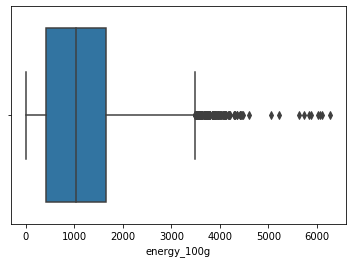

In [8]:
#-----------------------------------------------------------------------------------------------------------------
#
# energy_100g  - box plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name]);


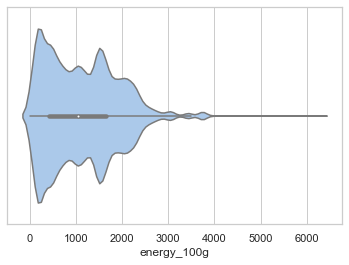

In [8]:
#------------------------------------------------------------------------------------------------------------#
#
# Essaions Seaborn: energy_100g
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x=food_data['energy_100g'], figsize=(16,8), grid=True);



In [9]:
#-----------------------------------------------------------------------------------------------------------------
#
#  Il y a des valeurs extrêmes dans l'ensemble de valeurs, selon le boxplot, qui semble être dans l'intervalle [0; 3000]
#  
#  On choisit des registres avec des valeurs danst cette intervalle
#
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>=0) & (df_aux[col_name]<3000)]

df_aux2.describe()


,energy_100g
count,94771.000000
mean,1072.478258
std,721.698316
min,0.000000
25%,417.000000
50%,1019.000000
75%,1623.000000
max,2999.000000


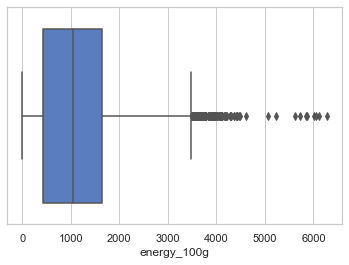

In [11]:
#-----------------------------------------------------------------------------------------------------------------
#
#  1671 registres ont été écartés. La moyenne a legèrement changé à la baisse mais proche de la mediane
#  
#  Boxplot #2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette="muted");


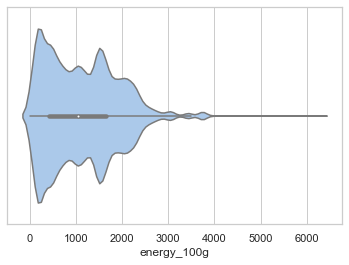

In [12]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: energy_100g  violonplot #2
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x=df_aux[col_name], figsize=(16,8), grid=True);


In [13]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = K * (Q[0.75]- Q[0.25])

print(Indice)


1837.5


In [12]:
#-----------------------------------------------------------------------------------------------------------------
#
#  Selon le boxplot, 4000 semble être une bornne supérieure raisonable. Outre, la règle du 1.5 x (Q3-Q1) 
#
#  donnee 1838 comme la borne supérieure conseillée. Donc, on filtre les registres avec energy_100g < 1838
#  
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) & (df_aux[col_name]<1848) ]  # les valeurs nulles sont aussi exclues

df_aux2.describe()


,energy_100g
count,77363.000000
mean,845.142110
std,542.772308
min,0.420000
25%,348.000000
50%,778.000000
75%,1368.000000
max,1847.000000


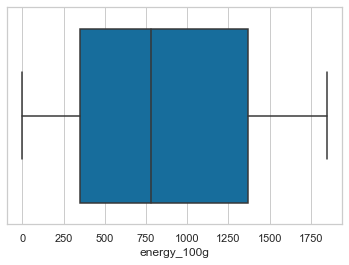

In [13]:
#-----------------------------------------------------------------------------------------------------------------
#
#  la baisse est considerable: 13484, soit à peu près 14%. La moyenne est aussi descendue de façon remarquable
#
#  boxplot #3 
#  
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "colorblind");


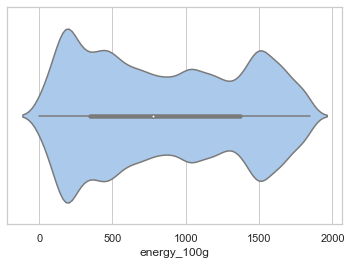

In [14]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: energy_100g  Violonplot #3
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x=df_aux2[col_name], figsize=(16,8), grid=True);


In [15]:
#-----------------------------------------------------------------------------------------------------------------
#
#  2eme colonne à analyser: fat_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'fat_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [16]:
#-----------------------------------------------------------------------------------------------------------------
#
# fat_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()

,fat_100g
count,80902.000000
mean,13.301154
std,17.142036
min,0.000000
25%,1.000000
50%,6.800000
75%,21.000000
max,105.000000


In [17]:
#-----------------------------------------------------------------------------------------------------------------
#
# On remarque la différence importante entre le nombre total de registres et le nombre de valeurs manquantes
#
# fat_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  fat_100g 
 Total valeurs manquantes: 42243 
 Pctg  valeurs manquantes: 34.30


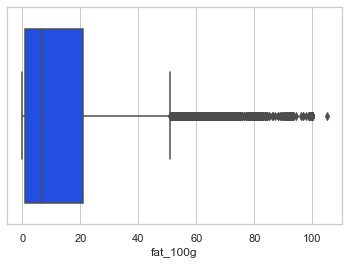

In [20]:
#-----------------------------------------------------------------------------------------------------------------
#
# Plus de 1/3 des données étaient manquates.
#
# fat_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette = "bright");

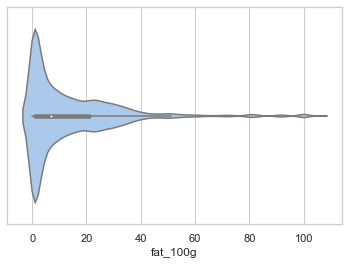

In [24]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: fat_100g  Violonplot
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x=df_aux[col_name], figsize=(16,8), grid=True);

In [26]:
#-----------------------------------------------------------------------------------------------------------------
#
# Assez curieux: une moyenne d'envion 13 et un écart type d'environ 17.
#
# Outre la moyenne est presque le double de la médiane, ce qui signale la présence de valeurs extrêmes.
#
# Plusieurs valeurs extrêmes expliquent
#
# cette anomalie. le boxplot montre que 50 peut être une limite supérieure à considerer.
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = K * (Q[0.75]- Q[0.25])

print(Indice)


30.0


In [27]:
#-----------------------------------------------------------------------------------------------------------------
#
# la règle 1.5 * (Q3 - Q1) donne une borne supérieur de 30 pour les valeurs. Le boxplot, une borne superieur de 50.
#
# Étant donné l'ecart considérable entre la moyenne et la médiane, je considère judicieux
#
# de reduire le dataframe aux valeurs dans l'intervalle [0; 30]
# 
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>=0) & (df_aux[col_name]<=30) ]

df_aux2.describe()


,fat_100g
count,70788.000000
mean,8.316806
std,8.916886
min,0.000000
25%,0.600000
50%,4.500000
75%,14.000000
max,30.000000


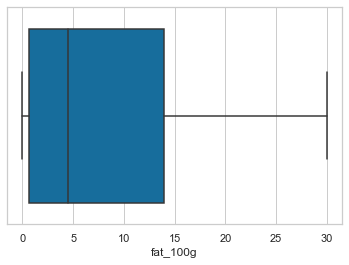

In [28]:
#-----------------------------------------------------------------------------------------------------------------
#
# fat_100g  - box plot # 2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "colorblind");


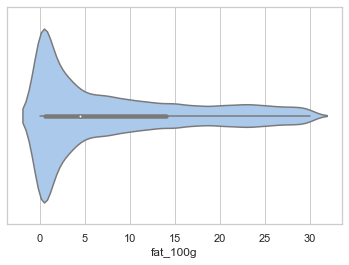

In [29]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: fat_100g  Violonplot
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x=df_aux2[col_name], figsize=(16,8), grid=True);

In [30]:
#-----------------------------------------------------------------------------------------------------------------
#
#  3eme colonne à analyser: saturated-fat_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'saturated-fat_100g'

df_aux =  food_data[['code', col_name]]

df_aux.shape[0]


123145

In [31]:
#-----------------------------------------------------------------------------------------------------------------
#
# saturated-fat_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,saturated-fat_100g
count,94485.000000
mean,5.222880
std,8.249504
min,0.000000
25%,0.300000
50%,1.900000
75%,7.000000
max,100.000000


In [28]:
#-----------------------------------------------------------------------------------------------------------------
#
# On remarque la différence importante entre le nombre total de registres et le nombre de valeurs manquantes
#
# saturated-fat_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  saturated-fat_100g 
 Total valeurs manquantes: 28660 
 Pctg  valeurs manquantes: 23.27


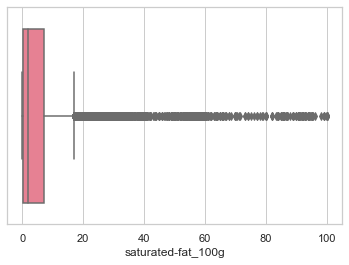

In [33]:
#-----------------------------------------------------------------------------------------------------------------
#
# Presque 1/4 de valeurs manquantes.
#
# saturated-fat_100g  - box plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette="husl");


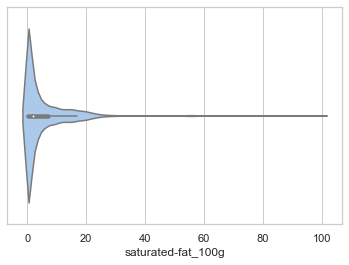

In [34]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: saturated_100g  Violonplot
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x=df_aux[col_name], figsize=(16,8), grid=True);

In [35]:
#-----------------------------------------------------------------------------------------------------------------
#
# Une moyenne d'envion 5 et un écart type d'environ 8. 
#
# Outre la moyenne est presque le double de la médiane, ce qui signale la présence de valeurs extrêmes.
#
# le boxplot montre que 20 peut être une limite supérieure à considerer.
#
# L'ecart entre la moyenne et la médiane
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


10.05


In [36]:
#-----------------------------------------------------------------------------------------------------------------
#
# la règle 1.5 * (Q3 - Q1) donne une borne supérieur de 10.05 pour les valeurs. Le boxplot, 20.
#
# Étant donné un écart important entre la médiane et la moyenne, 
#
# on reduira le dataframe aux valeurs dans l'intervalle [0; 11]
# 
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>=0) & (df_aux[col_name]<=11)]

df_aux2.describe()


,saturated-fat_100g
count,78702.000000
mean,2.323960
std,2.860345
min,0.000000
25%,0.100000
50%,1.000000
75%,3.500000
max,11.000000


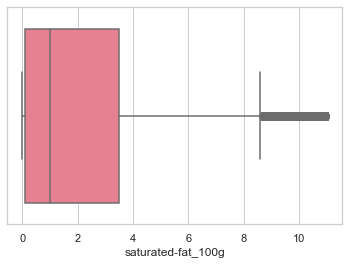

In [37]:
#-----------------------------------------------------------------------------------------------------------------
#
# saturatedfat_100g  - box plot - Il semble que le saturated_fat soit très dispersé
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "husl");


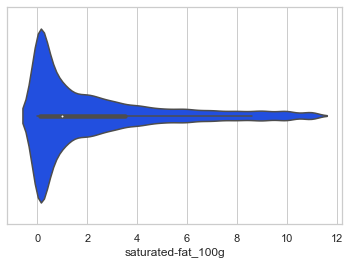

In [38]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: saturated-fat_100g  Violonplot
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="bright", color_codes=True)

sns.violinplot(x=df_aux2[col_name], figsize=(16,8), grid=True);


In [39]:
#-----------------------------------------------------------------------------------------------------------------
#
#  4eme colonne à analyser: monounsaturated-fat_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'monounsaturated-fat_100g'

df_aux =  food_data[['code', col_name]]

df_aux.shape[0]


123145

In [40]:
#-----------------------------------------------------------------------------------------------------------------
#
# monounsaturated-fat_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,monounsaturated-fat_100g
count,1301.000000
mean,19.094655
std,22.239083
min,0.000000
25%,2.600000
50%,9.500000
75%,26.000000
max,82.000000


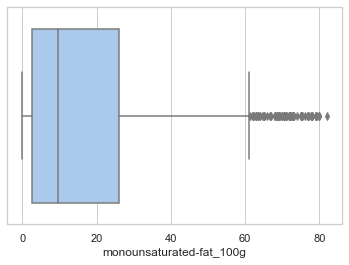

In [41]:
#-----------------------------------------------------------------------------------------------------------------
#
# monounsaturated-fat_100g  - box plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette = "pastel")


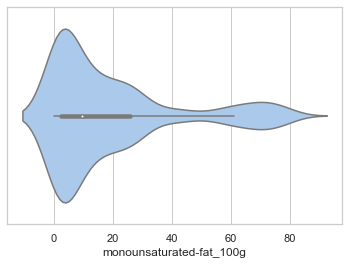

In [42]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: monosaturated_100g  Violonplot
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x=df_aux[col_name], figsize=(16,8), grid=True);

In [43]:
#-----------------------------------------------------------------------------------------------------------------
#
# Une moyenne d'envion 19 et un écart type d'environ 22, avec un moyenne, le double de la médiane,
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


35.099999999999994


In [45]:
#-----------------------------------------------------------------------------------------------------------------
#
# Indice  K*(Q3-Q1) > 35 et maximum de 60 pour le boxplot. Je prends 40 comme limite supérieure 
#
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>=0) & (df_aux[col_name]<=35.1)]

df_aux2.describe()


,monounsaturated-fat_100g
count,1078.000000
mean,10.086824
std,9.495594
min,0.000000
25%,2.000000
50%,6.700000
75%,17.000000
max,35.000000


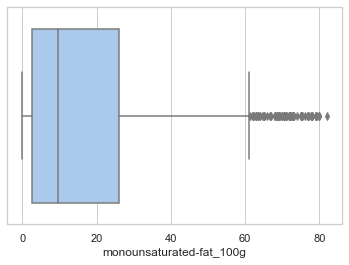

In [46]:
#-----------------------------------------------------------------------------------------------------------------
#
# La moyenne et la médiane gardent un ecart raisonable. Mais l'ecart type reste considerable.
#
# Boxplot # 2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name]);


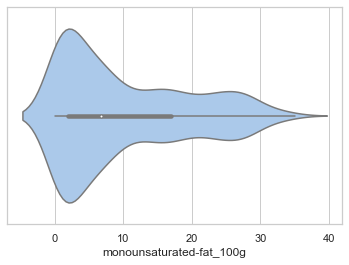

In [47]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: mnoounsaturated-fat_100g  Violonplot
#
#------------------------------------------------------------------------------------------------------------#

sns.violinplot(x=df_aux2[col_name], figsize=(16,8), grid=True);


In [48]:
#-----------------------------------------------------------------------------------------------------------------
#
#  5eme colonne à analyser: polyunsaturated-fat_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'polyunsaturated-fat_100g'

df_aux =  food_data[['code', col_name]]

df_aux.shape[0]


123145

In [49]:
#-----------------------------------------------------------------------------------------------------------------
#
# polyunsaturated_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,polyunsaturated-fat_100g
count,1320.000000
mean,10.402308
std,15.582438
min,0.000000
25%,1.500000
50%,3.500000
75%,12.000000
max,75.000000


In [50]:
#-----------------------------------------------------------------------------------------------------------------
#
# On remarque la différence ÉNORME entre le nombre total de registres et le nombre de valeurs manquantes
#
# polyunsaturated_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  polyunsaturated-fat_100g 
 Total valeurs manquantes: 121825 
 Pctg  valeurs manquantes: 98.93


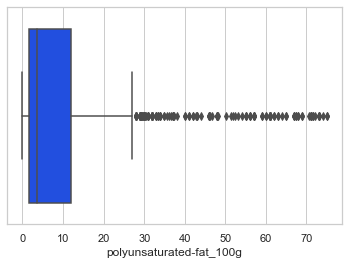

In [52]:
#-----------------------------------------------------------------------------------------------------------------
#
# Plus de 98% des données sont manquantes.
#
# polyunsaturated_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette = "bright");


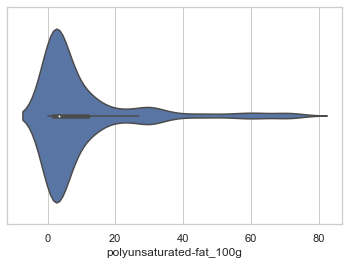

In [54]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: poliunsaturated_100g  Violonplot
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="deep", color_codes=True)

sns.violinplot(x=df_aux[col_name], figsize=(16,8), grid=True);

In [55]:
#-----------------------------------------------------------------------------------------------------------------
#
# Une moyenne d'envion 5 et un écart type d'environ 15. La médiane presque 1/3 de la moyenne, 
#
# Cela signale la présence de valeurs extrêmes.
#
# le boxplot montre que 20 peut être une limite supérieure à considerer.
#
# L'ecart entre la moyenne et la médiane
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


15.75


In [56]:
#-----------------------------------------------------------------------------------------------------------------
#
# la règle 1.5 * (Q3 - Q1) donne une borne supérieur de presque 16. Le boxplot, une borne superieur de presque 30.
#
# Étant donné l'ecart considérable entre la moyenne et la médiane, je considère judicieux
#
# de reduire le dataframe aux valeurs dans l'intervalle [0; 16]
# 
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>=0) & (df_aux[col_name]<=16) ]

df_aux2.describe()


,polyunsaturated-fat_100g
count,1078.000000
mean,4.124032
std,3.831242
min,0.000000
25%,1.300000
50%,2.900000
75%,5.885000
max,16.000000


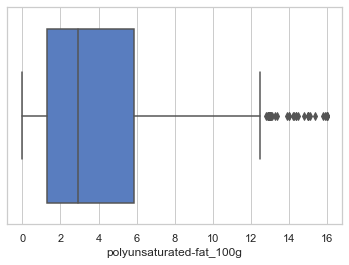

In [57]:
#-----------------------------------------------------------------------------------------------------------------
#
# polyunsaturated-fat_100g  - box plot # 2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "muted");


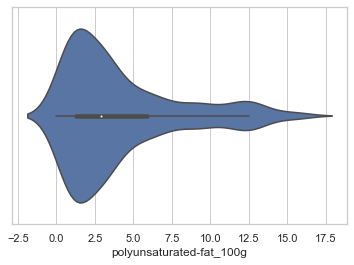

In [58]:
#-----------------------------------------------------------------------------------------------------------------
#
# polyunsaturated-fat_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name]);


In [59]:
#-----------------------------------------------------------------------------------------------------------------
#
#  6eme colonne à analyser: trans-fat_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'trans-fat_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

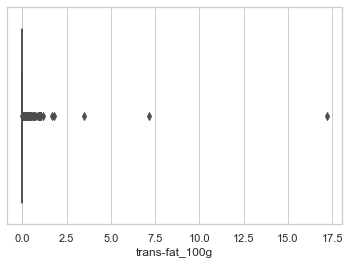

In [60]:
#-----------------------------------------------------------------------------------------------------------------
#
# trans-fat_100g  - box plot # 1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette = "bright");


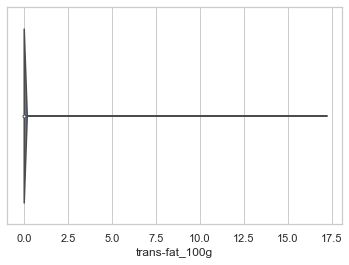

In [61]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: trans-fat_100g  Violonplot
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="deep", color_codes=True)

sns.violinplot(x=df_aux[col_name], figsize=(16,8), grid=True);

In [62]:
#-----------------------------------------------------------------------------------------------------------------
#
# trans-fat_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,trans-fat_100g
count,123145.000000
mean,0.000743
std,0.057326
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,17.200000


In [64]:
#-----------------------------------------------------------------------------------------------------------------
#
# Aucune différence entre le nombre total de registres et le nombre de valeurs manquantes
#
# trans-fat_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  trans-fat_100g 
 Total valeurs manquantes: 0 
 Pctg  valeurs manquantes: 0.00


In [65]:
#-----------------------------------------------------------------------------------------------------------------
#
# Une médiane nulle. C'est possible que cette colonne ne contienne pas d'information significative.
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


0.0


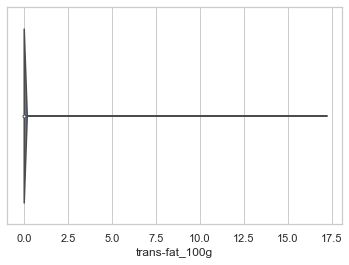

In [67]:
#-----------------------------------------------------------------------------------------------------------------
#
# Un indice interquartile de zéro: cette colonne n'est pas pertinente pour une analyse numérique
# malgré la quantité de registres disponibles.
#
# Pas de box plot. On fait le viloinplot. On passe à la colonne suivante.
#
#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------
#
# trans-fat_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name]);


In [71]:
#-----------------------------------------------------------------------------------------------------------------
#
#  7ème colonne à analyser: carbohydrates_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'carbohydrates_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [72]:
#-----------------------------------------------------------------------------------------------------------------
#
# carbohydrates_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,carbohydrates_100g
count,80492.000000
mean,27.703505
std,27.461611
min,0.000000
25%,4.000000
50%,14.500000
75%,53.000000
max,165.000000


In [73]:

#-----------------------------------------------------------------------------------------------------------------
#
# On remarque la différence importante entre le nombre total de registres et le nombre de valeurs manquantes
#
# carbohydratest_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  carbohydrates_100g 
 Total valeurs manquantes: 42653 
 Pctg  valeurs manquantes: 34.64


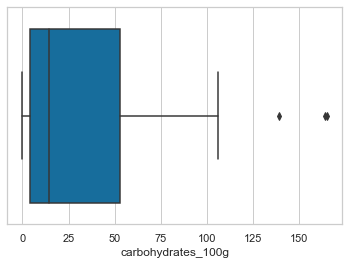

In [74]:
#-----------------------------------------------------------------------------------------------------------------
#
# Plus de 1/3 des données étaient manquates.
#
# carbohydrates_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette = "colorblind");

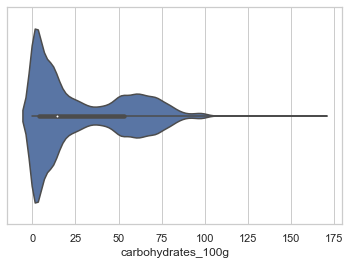

In [75]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: carbohydrates_100g_100g  Violonplot
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="deep", color_codes=True)

sns.violinplot(x=df_aux[col_name], figsize=(16,8), grid=True);

In [77]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)

73.5


In [78]:
#-----------------------------------------------------------------------------------------------------------------------
#
# Le moyenne est presque le double de la médiane.
#
# la règle 1.5 * (Q3 - Q1) donne une borne supérieur de 73.5 pour les valeurs. Le boxplot, une borne supérieur de 100+.
#
# Étant donné l'ecart considérable entre la moyenne et la médiane, je considère judicieux
#
# de reduire le dataframe aux valeurs dans l'intervalle [0; 75]
# 
#------------------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name] >0 ) & ( df_aux[col_name] <= 75) ]

df_aux2.describe()

,carbohydrates_100g
count,71842.00000
mean,25.50059
std,24.24561
min,0.00010
25%,4.70000
50%,14.00000
75%,50.00000
max,75.00000


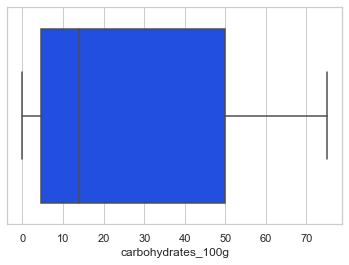

In [79]:
#-----------------------------------------------------------------------------------------------------------------
#
# carbohydrates_100g  - box plot # 2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "bright");


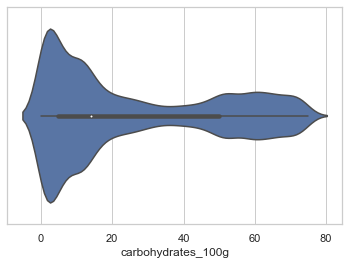

In [81]:
#-----------------------------------------------------------------------------------------------------------------
#
# carbohydrates_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name]);


In [108]:
#-----------------------------------------------------------------------------------------------------------------
#
#  8eme colonne à analyser: sugars_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'sugars_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [109]:
#-----------------------------------------------------------------------------------------------------------------
#
# sugars_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,sugars_100g
count,123145.000000
mean,10.310141
std,17.720738
min,0.000000
25%,0.000000
50%,2.000000
75%,11.500000
max,145.000000


In [110]:
#-----------------------------------------------------------------------------------------------------------------
#
# sugars_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  sugars_100g 
 Total valeurs manquantes: 0 
 Pctg  valeurs manquantes: 0.00


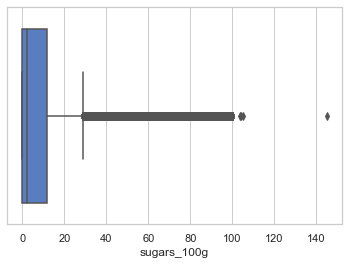

In [111]:
#-----------------------------------------------------------------------------------------------------------------
#
# Bravo. Aucune valeur manquante
#
# sugars_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette = "muted");


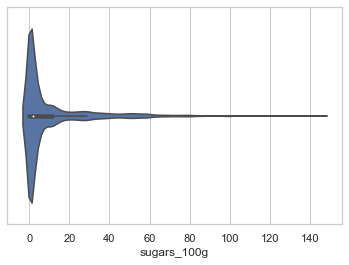

In [112]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: sugars_100g  Violonplot
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="deep", color_codes=True)

sns.violinplot(x=df_aux[col_name], figsize=(16,8), grid=True);

In [113]:

#-----------------------------------------------------------------------------------------------------------------
#
# La moyenne est presque 5 fois la médiane. 
#
# L'ecart type est considerable.
#
# le boxplot montre que 20 peut être une limite supérieure à considerer.
#
# L'ecart entre la moyenne et la médiane
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


17.25


In [114]:
#-----------------------------------------------------------------------------------------------------------------
#
# la règle 1.5 * (Q3 - Q1) donne une borne proche de 18 similaire aux boxplot.
#
# Étant donné l'ecart considérable entre la moyenne et la médiane, je considère judicieux
#
# de reduire le dataframe aux valeurs dans l'intervalle ]0; 18[
# 
# Cette fois-ci, j'exclue les registres avec valeur 0 car elles semblent être nombreux
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) & (df_aux[col_name]<18) ]

df_aux2.describe()


,sugars_100g
count,63834.000000
mean,4.451820
std,4.462656
min,0.000100
25%,1.000000
50%,2.800000
75%,6.500000
max,17.900000


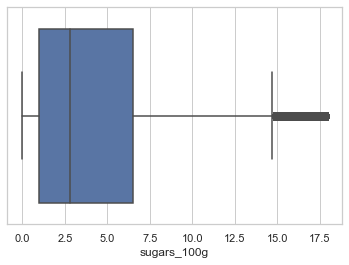

In [115]:
#-----------------------------------------------------------------------------------------------------------------
#
# sugars_100g  - box plot # 2 - registres avec les valeurs zéro éxclues
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name]);


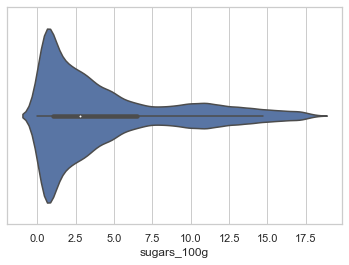

In [116]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: sugars_100g  Violonplot 2
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="deep", color_codes=True)

sns.violinplot(x=df_aux2[col_name], figsize=(16,8), grid=True);

In [128]:
#-----------------------------------------------------------------------------------------------------------------
#
#  9eme colonne à analyser: fiber_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'fiber_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [129]:
#-----------------------------------------------------------------------------------------------------------------
#
# fiber_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,fiber_100g
count,1.231450e+05
mean,6.887679e+05
std,2.417021e+08
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.500000e+00
max,8.481815e+10


In [130]:
#-----------------------------------------------------------------------------------------------------------------
#
# Il semble y avoir des anomalies dans les valeurs de cette colonne
#
# fiber_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------
ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  fiber_100g 
 Total valeurs manquantes: 0 
 Pctg  valeurs manquantes: 0.00


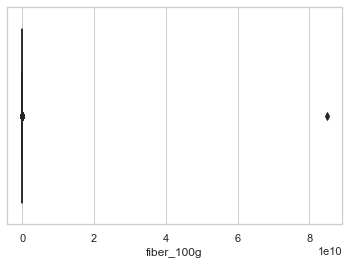

In [132]:
#-----------------------------------------------------------------------------------------------------------------
#
# Aucune donnée n'était manquante.
#
# fiber_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette ="dark");


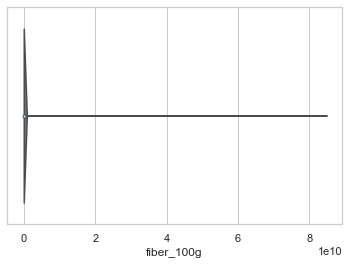

In [123]:
#------------------------------------------------------------------------------------------------------------#
#
#  Seaborn: fiber_100g  Violonplot 1
#
#------------------------------------------------------------------------------------------------------------#

sns.set(style="whitegrid", palette="deep", color_codes=True)

sns.violinplot(x=df_aux[col_name], figsize=(16,8), grid=True);

In [133]:
#-----------------------------------------------------------------------------------------------------------------
#
# Le boxplot confirme un comportement anormal des données. Une ou plusieurs valeurs extrêmes.
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


2.25


In [134]:
#-----------------------------------------------------------------------------------------------------------------
#
# la règle 1.5 * (Q3 - Q1) donne une borne supérieur de 2.25. Le boxplot n'en donne aucune.
#
# Étant donné l'ecart considérable entre la moyenne et la médiane, je considère judicieux
#
# de reduire le dataframe aux valeurs dans l'intervalle ]0; 3], excluant les registres qui ont des valeurs nulles
# 
# qui semblen être nombreux
#
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) & (df_aux[col_name]<=3) ]

df_aux2.describe()


,fiber_100g
count,2.817300e+04
mean,1.488041e+00
std,8.583446e-01
min,1.440000e-12
25%,7.000000e-01
50%,1.500000e+00
75%,2.120000e+00
max,3.000000e+00


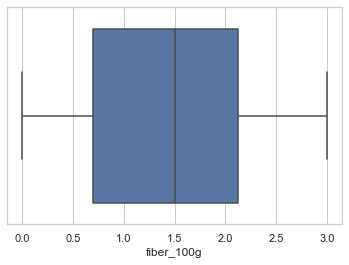

In [126]:
#-----------------------------------------------------------------------------------------------------------------
#
# fiber_100g  - box plot # 2 - très raisonable sans les valeurs 0
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name]);


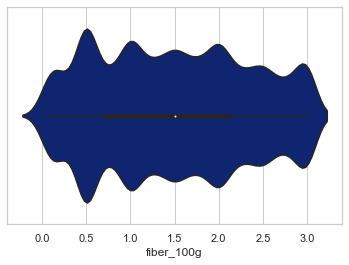

In [127]:
#-----------------------------------------------------------------------------------------------------------------
#
# fiber_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name], palette = "dark");


In [135]:
#-----------------------------------------------------------------------------------------------------------------
#
#  10eme colonne à analyser: proteins_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'proteins_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [136]:
#-----------------------------------------------------------------------------------------------------------------
#
# proteins_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,proteins_100g
count,123145.000000
mean,6.077320
std,8.070876
min,0.000000
25%,0.000000
50%,3.400000
75%,8.600000
max,305.000000


In [137]:
#-----------------------------------------------------------------------------------------------------------------
#
# proteins_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  proteins_100g 
 Total valeurs manquantes: 0 
 Pctg  valeurs manquantes: 0.00


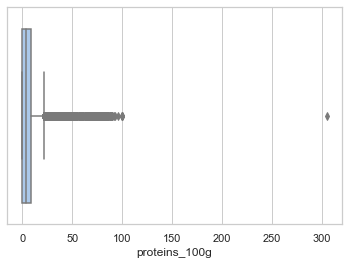

In [138]:
#-----------------------------------------------------------------------------------------------------------------
#
# Aucune donnée manquante
#
# proteins_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette = "pastel");


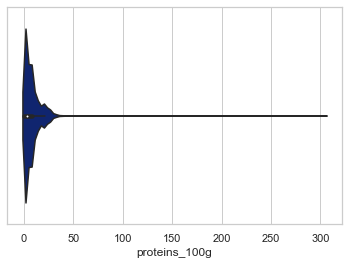

In [139]:
#-----------------------------------------------------------------------------------------------------------------
#
# proteins_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette = "dark");

In [140]:
#-----------------------------------------------------------------------------------------------------------------
#
# Une médiane d'envion 3.4 et une valeur maximales de 300. 
#
# le boxplot montre qu'entre 15 et 20 peut être une limite supérieure à considerer.
#
# L'ecart entre la moyenne et la médiane
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


12.899999999999999


In [142]:
#-----------------------------------------------------------------------------------------------------------------
#
# La règle 1.5 * (Q3 - Q1) donne une borne supérieur proche 13 pour les valeurs..
#
# de reduire le dataframe aux valeurs dans l'intervalle ]0; 13], les valeurs nulles exclues
# 
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) & (df_aux[col_name]<=13) ]

df_aux2.describe()


,proteins_100g
count,71966.000000
mean,5.105054
std,3.639965
min,0.000100
25%,1.700000
50%,5.000000
75%,7.700000
max,13.000000


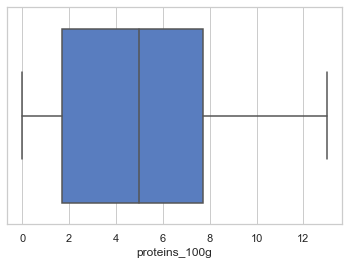

In [144]:
#-----------------------------------------------------------------------------------------------------------------
#
# proteins_100g  - box plot # 2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "muted");


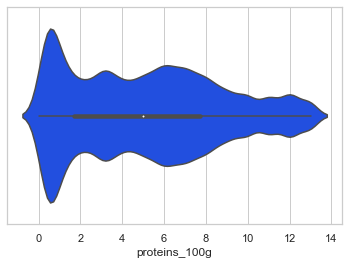

In [145]:
#-----------------------------------------------------------------------------------------------------------------
#
# proteins_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name], palette = "bright");


In [146]:
#-----------------------------------------------------------------------------------------------------------------
#
#  11eme colonne à analyser: salt_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'salt_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [147]:
#-----------------------------------------------------------------------------------------------------------------
#
# salt_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,salt_100g
count,94637.000000
mean,1.162711
std,4.391273
min,0.000000
25%,0.050800
50%,0.500000
75%,1.210000
max,100.000000


In [148]:
#-----------------------------------------------------------------------------------------------------------------
#
# salt_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  salt_100g 
 Total valeurs manquantes: 28508 
 Pctg  valeurs manquantes: 23.15


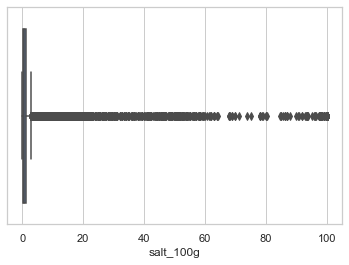

In [149]:
#-----------------------------------------------------------------------------------------------------------------
#
# Presque de 1/4 des données étaient manquantes.
#
# salt_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name]);


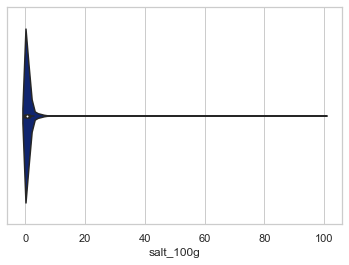

In [151]:
#-----------------------------------------------------------------------------------------------------------------
#
# salt_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette = "dark");

In [152]:
#-----------------------------------------------------------------------------------------------------------------
#
# les valeurs semblent être très dispersées.
#
# Outre la moyenne est plus du double de la médiane, ce qui signale la présence de valeurs extrêmes.
#
# le boxplot ne montre aucune piste sur la valeurs superieure.
#
# L'ecart entre la moyenne et la médiane
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


1.7388


In [153]:
#-----------------------------------------------------------------------------------------------------------------
#
# l'indicateur 1.5 * (Q3 - Q1) donne une borne supérieur proche de 2 pour les valeurs.
#
# On reduit le dataframe aux valeurs dans l'intervalle ]0; 2], laes valeurs nulles exclues
# 
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) & (df_aux[col_name]<=2) ]

df_aux2.describe()


,salt_100g
count,7.558500e+04
mean,6.410069e-01
std,5.848993e-01
min,5.000000e-08
25%,1.000000e-01
50%,5.100000e-01
75%,1.080000e+00
max,2.000000e+00


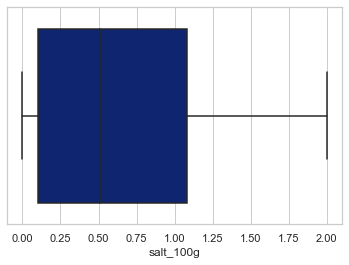

In [154]:
#-----------------------------------------------------------------------------------------------------------------
#
# salt_100g  - box plot # 2 
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "dark");


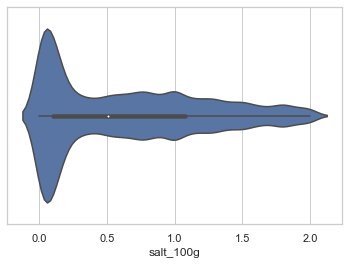

In [155]:
#-----------------------------------------------------------------------------------------------------------------
#
# salt_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name]);


In [156]:
#-----------------------------------------------------------------------------------------------------------------
#
# 12eme colonne à analyser: sodium_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'sodium_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [157]:
#-----------------------------------------------------------------------------------------------------------------
#
# sodium_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,sodium_100g
count,94633.000000
mean,0.457779
std,1.728882
min,0.000000
25%,0.020000
50%,0.196850
75%,0.476378
max,39.370079


In [158]:
#-----------------------------------------------------------------------------------------------------------------
#
# sodium_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  sodium_100g 
 Total valeurs manquantes: 28512 
 Pctg  valeurs manquantes: 23.15


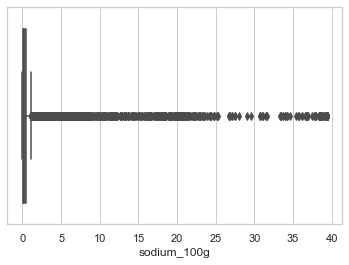

In [160]:
#-----------------------------------------------------------------------------------------------------------------
#
# Presque 1/4 des données étaient manquantes.
#
# sodium_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name]);


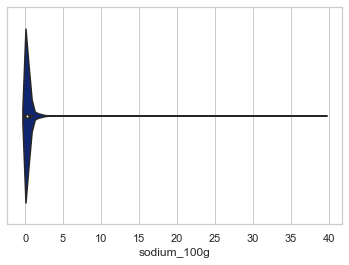

In [162]:
#-----------------------------------------------------------------------------------------------------------------
#
# sodium_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette = "dark");


In [163]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)

0.6845669291338574


In [164]:
#-----------------------------------------------------------------------------------------------------------------
#
# L'indice 1.5 * (Q3 - Q1) donne une borne supérieur proches de 1 pour les valeurs. Le boxplot, aucune piste
#
#  le dataframe dans l'intervalle ]0; 1]
# 
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) & (df_aux[col_name]<=1) ]

df_aux2.describe()


,sodium_100g
count,7.839200e+04
mean,2.752899e-01
std,2.557057e-01
min,1.968504e-08
25%,3.937008e-02
50%,2.244094e-01
75%,4.448819e-01
max,1.000000e+00


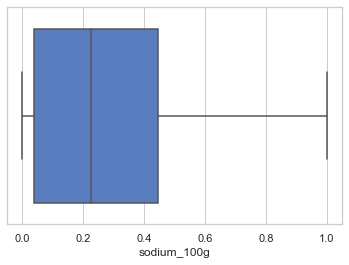

In [165]:
#-----------------------------------------------------------------------------------------------------------------
#
# sodium_100g  - box plot # 2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "muted");


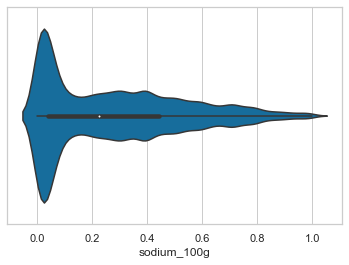

In [166]:
#-----------------------------------------------------------------------------------------------------------------
#
# sodium_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name], palette = "colorblind");


In [167]:
#-----------------------------------------------------------------------------------------------------------------
#
#  13eme colonne à analyser: alcohol_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'alcohol_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [168]:
#-----------------------------------------------------------------------------------------------------------------
#
# alcohol_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,alcohol_100g
count,2754.000000
mean,9.810857
std,10.714463
min,0.000000
25%,4.200000
50%,6.600000
75%,12.500000
max,72.000000


In [169]:
#-----------------------------------------------------------------------------------------------------------------
#
# alcohol_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  alcohol_100g 
 Total valeurs manquantes: 120391 
 Pctg  valeurs manquantes: 97.76


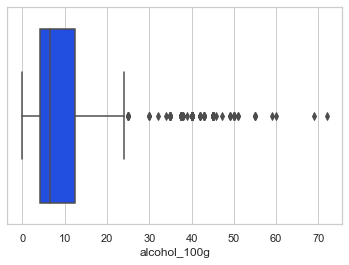

In [170]:
#-----------------------------------------------------------------------------------------------------------------
#
# Plus de 97% des données étaient manquantes.
#
# alcohol_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette = "bright");


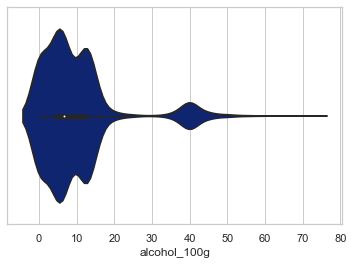

In [172]:
#-----------------------------------------------------------------------------------------------------------------
#
# alcohol_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette = "dark");


In [173]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)

12.450000000000001


In [174]:
#-----------------------------------------------------------------------------------------------------------------
#
# L'indice 1.5 * (Q3 - Q1) donne une borne proche de 13 pour les valeurs. Le boxplot, une borne superieur de 20.
#
# Étant donné l'ecart de 50% entre la moyenne et la médiane, je considère judicieux
#
# de reduire le dataframe aux valeurs dans l'intervalle ]0; 15], valeurs nulles exclues
# 
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) & (df_aux[col_name]<=15) ]

df_aux2.describe()


,alcohol_100g
count,1962.000000
mean,8.276350
std,3.895274
min,0.030000
25%,5.000000
50%,7.200000
75%,12.500000
max,15.000000


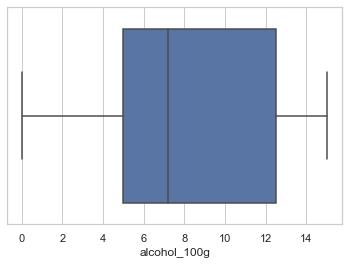

In [175]:
#-----------------------------------------------------------------------------------------------------------------
#
# alcohol_100g  - box plot # 2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name]);


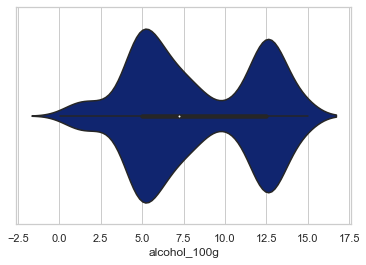

In [176]:
#-----------------------------------------------------------------------------------------------------------------
#
# alcohol_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name], palette = "dark");


In [177]:
#-----------------------------------------------------------------------------------------------------------------
#
#  14eme colonne à analyser: vitamin-a_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'vitamin-a_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [178]:
#-----------------------------------------------------------------------------------------------------------------
#
# vitamin-a_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,vitamin-a_100g
count,123145.000000
mean,0.000004
std,0.000558
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.140000


In [179]:
#-----------------------------------------------------------------------------------------------------------------
#
# vitamin-a_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  vitamin-a_100g 
 Total valeurs manquantes: 0 
 Pctg  valeurs manquantes: 0.00


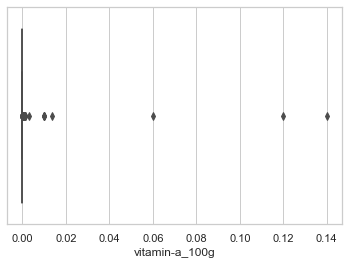

In [180]:
#-----------------------------------------------------------------------------------------------------------------
#
# Aucune donnée Nan
#
# vitamin-a_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name])


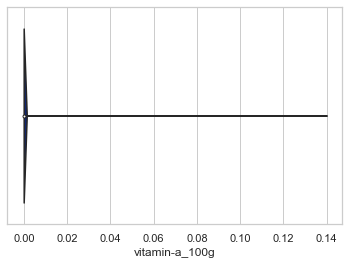

In [182]:
#-----------------------------------------------------------------------------------------------------------------
#
# vitamin-a_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette = "dark");

In [183]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


0.0


In [185]:
#-----------------------------------------------------------------------------------------------------------------
#
# L'indice 1.5 * (Q3 - Q1) donne une borne supérieur de 30 pour les valeurs. 
#
# Les valeurs de cette colonne semblent être négligeables pour les analyses ultérieures.
#
# Pour le boxplot final, on va reduire le dataframe aux valeurs dans l'intervalle ]0; 0.02]
# 
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) & (df_aux[col_name]<=0.002) ]

df_aux2.describe()


,vitamin-a_100g
count,5.120000e+02
mean,3.336578e-04
std,2.866278e-04
min,1.600000e-08
25%,1.200000e-04
50%,2.000000e-04
75%,5.640000e-04
max,1.381000e-03


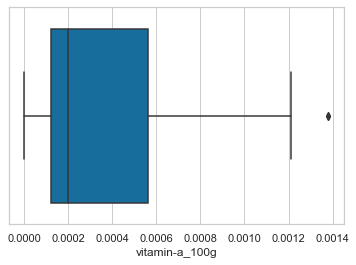

In [186]:
#-----------------------------------------------------------------------------------------------------------------
#
# vitamin-a_100g  - box plot # 2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "colorblind");


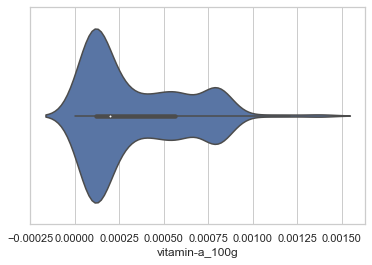

In [187]:
#-----------------------------------------------------------------------------------------------------------------
#
# vitamin-a_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name]);


In [188]:
#-----------------------------------------------------------------------------------------------------------------
#
#  15eme colonne à analyser: vitamin-c_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'vitamin-c_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [189]:
#-----------------------------------------------------------------------------------------------------------------
#
# vitamin-a_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,vitamin-c_100g
count,123145.000000
mean,0.001356
std,0.287565
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


In [191]:
#-----------------------------------------------------------------------------------------------------------------
#
# vitamin-c_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  vitamin-c_100g 
 Total valeurs manquantes: 0 
 Pctg  valeurs manquantes: 0.00


In [192]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


0.0


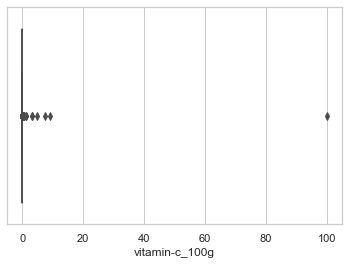

In [193]:
#-----------------------------------------------------------------------------------------------------------------
#
# vitamin-c_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name]);


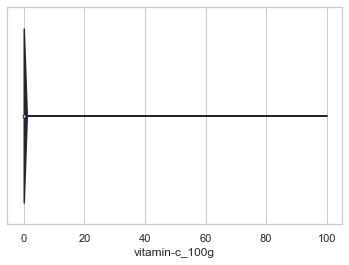

In [195]:
#-----------------------------------------------------------------------------------------------------------------
#
# vitamin_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette = "dark");


In [196]:
#-----------------------------------------------------------------------------------------------------------------
#
# L'indice 1.5 * (Q3 - Q1) donne une borne supérieure nulle pour les valeurs. 
#
# Les valeurs de cette colonne semblent être négligeables pour les analyses ultérieures.
#
# Pour le boxplot final, on va reduire le dataframe aux valeurs dans l'intervalle ]0;0.1]
# 
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) & (df_aux[col_name]<=0.1) ]

df_aux2.describe()


,vitamin-c_100g
count,1253.000000
mean,0.025048
std,0.017929
min,0.000046
25%,0.012000
50%,0.020000
75%,0.030000
max,0.100000


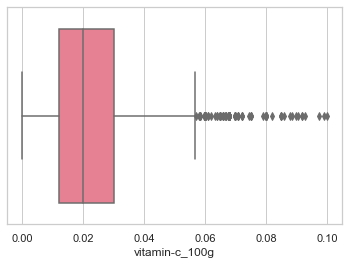

In [197]:
#-----------------------------------------------------------------------------------------------------------------
#
# vitamin-c_100g  - box plot #2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "husl");


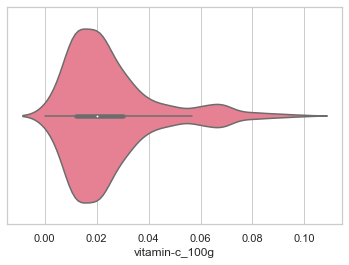

In [198]:
#-----------------------------------------------------------------------------------------------------------------
#
# vitamin-c_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name], palette = "husl");


In [199]:
#-----------------------------------------------------------------------------------------------------------------
#
#  15ème colonne à analyser: calcium_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'calcium_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [200]:
#-----------------------------------------------------------------------------------------------------------------
#
# calcium_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,calcium_100g
count,2544.000000
mean,0.413061
std,4.017402
min,0.000000
25%,0.120000
50%,0.127000
75%,0.300000
max,150.000000


In [202]:
#-----------------------------------------------------------------------------------------------------------------
#
# calcium_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  calcium_100g 
 Total valeurs manquantes: 120601 
 Pctg  valeurs manquantes: 97.93


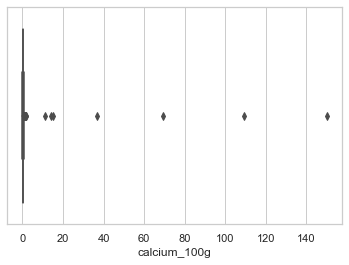

In [203]:
#-----------------------------------------------------------------------------------------------------------------
#
# Presque 98% des données manquantes.
#
# calcium_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name]);


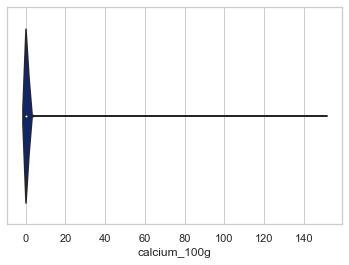

In [205]:
#-----------------------------------------------------------------------------------------------------------------
#
# calcium_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette = "dark");


In [206]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


0.27


In [207]:
#-----------------------------------------------------------------------------------------------------------------
#
# L'indice 1.5 * (Q3 - Q1) donne une borne supérieur proche de 0.30 pour les valeurs. Le boxplot, aucune.
#
# Étant donné l'ecart considérable entre la moyenne et la médiane, je considère judicieux
#
# de reduire le dataframe aux valeurs dans l'intervalle [0; 0.30]
# 
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) & (df_aux[col_name]<=0.30) ]  # valeurs nulles exclues

df_aux2.describe()


,calcium_100g
count,1820.000000
mean,0.128765
std,0.063943
min,0.000002
25%,0.120000
50%,0.120000
75%,0.150000
max,0.300000


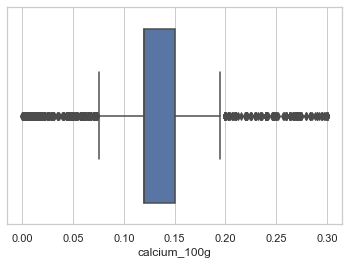

In [208]:
#-----------------------------------------------------------------------------------------------------------------
#
# calcium_100g  - box plot # 2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "deep");


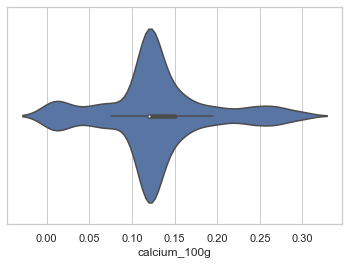

In [209]:
#-----------------------------------------------------------------------------------------------------------------
#
# calcium_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name], palette= "deep");


In [210]:
#-----------------------------------------------------------------------------------------------------------------
#
#  17eme colonne à analyser: iron_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'iron_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [211]:
#-----------------------------------------------------------------------------------------------------------------
#
# iron_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,iron_100g
count,123145.000000
mean,0.000558
std,0.081008
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,25.000000


In [212]:
#-----------------------------------------------------------------------------------------------------------------
#
# iron_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}',
      '\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  iron_100g 
 Total valeurs manquantes: 0 
 Pctg  valeurs manquantes: 0.00


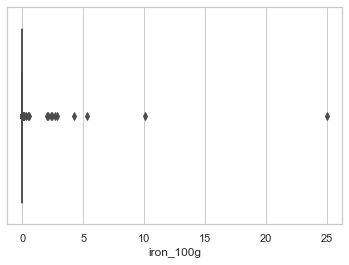

In [213]:
#-----------------------------------------------------------------------------------------------------------------
#
# Aucune valeur manquante
#
# iron_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name]);


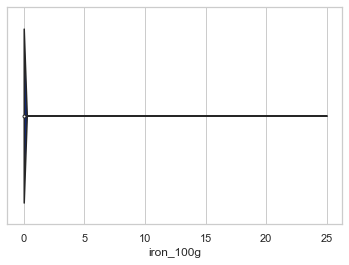

In [214]:
#-----------------------------------------------------------------------------------------------------------------
#
# iron_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette = "dark");

In [215]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


0.0


In [216]:
#-----------------------------------------------------------------------------------------------------------------
#
# L'indice 1.5 * (Q3 - Q1) donne une borne supérieur de 0. Le boxplor permet de conjecturer 0.04 comme borne sup.
#
# Cette colonne ne semble pas avoir d'information pertinente.
#
# On prend les valeurs dans l'intervalle ]0; 0.04], les valeurs nulles exclues.
# 
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) &  (df_aux[col_name]< 0.04)]

df_aux2.describe()


,iron_100g
count,1230.000000
mean,0.006151
std,0.004884
min,0.000005
25%,0.002600
50%,0.005200
75%,0.008000
max,0.037100


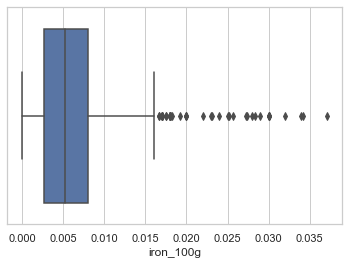

In [217]:
#-----------------------------------------------------------------------------------------------------------------
#
# iron_100g  - box plot # 2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "deep");


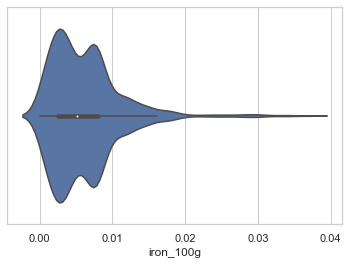

In [218]:
#-----------------------------------------------------------------------------------------------------------------
#
# iron_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name], palette = "deep");


In [219]:
#-----------------------------------------------------------------------------------------------------------------
#
#  18eme colonne à analyser: copper_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'copper_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [220]:
#-----------------------------------------------------------------------------------------------------------------
#
# copper_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,copper_100g
count,123145.000000
mean,0.000309
std,0.107152
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,37.600000


In [222]:
#-----------------------------------------------------------------------------------------------------------------
#
# copper_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  copper_100g 
 Total valeurs manquantes: 0 
 Pctg  valeurs manquantes: 0.00


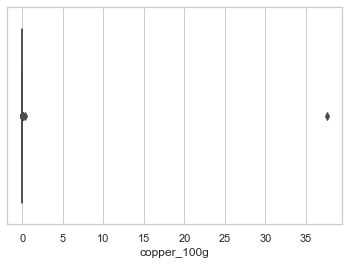

In [223]:
#-----------------------------------------------------------------------------------------------------------------
#
# Aucune valeur manquante
#
# copper_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name]);


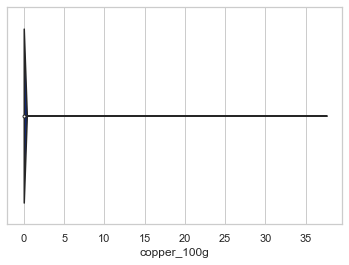

In [224]:
#-----------------------------------------------------------------------------------------------------------------
#
# copper_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette = "dark");

In [225]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


0.0


In [226]:
#-----------------------------------------------------------------------------------------------------------------
#
# L'indice 1.5 * (Q3 - Q1) donne une borne supérieur de 0. Le boxplot ne donne aucune piste.
#
# Après plusieurs esssais et erreurs, j'ai constaté que un intervalle raisonable est ]0; 0.001]
3
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) & (df_aux[col_name]<=0.001)]

df_aux2.describe()


,copper_100g
count,113.000000
mean,0.000355
std,0.000302
min,0.000022
25%,0.000050
50%,0.000292
75%,0.000500
max,0.001000


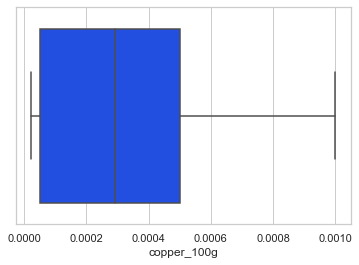

In [227]:
#-----------------------------------------------------------------------------------------------------------------
#
# copper_100g  - box plot # 2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette = "bright");


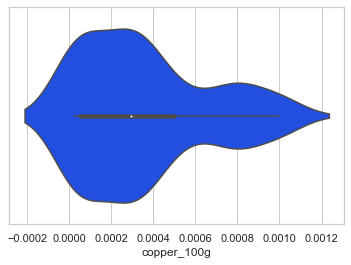

In [228]:
#-----------------------------------------------------------------------------------------------------------------
#
# copper_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name], palette = "bright");


In [240]:
#-----------------------------------------------------------------------------------------------------------------
#
#  18eme colonne à analyser: selenium_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'selenium_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [230]:
#-----------------------------------------------------------------------------------------------------------------
#
# selenium_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,selenium_100g
count,1.231450e+05
mean,2.846031e-07
std,8.575357e-05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,3.000000e-02


In [241]:
#-----------------------------------------------------------------------------------------------------------------
#
# selenium_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}',
      '\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  selenium_100g 
 Total valeurs manquantes: 0 
 Pctg  valeurs manquantes: 0.00


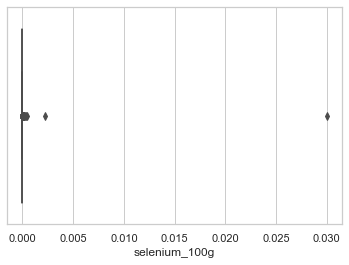

In [242]:
#-----------------------------------------------------------------------------------------------------------------
#
# Aucune donnée manquante.
#
# selenium_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name]);


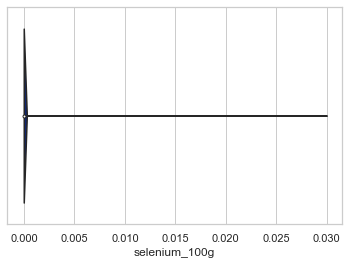

In [243]:
#-----------------------------------------------------------------------------------------------------------------
#
# selenium_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette = "dark");

In [244]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1)  - Etant les valeurs si petites, je multiplie l'index par 100000
#
# afin d'avoir une meilleur aperçu de sa valeur.
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5 * 100000

print(Indice)


0.0


In [245]:
#-----------------------------------------------------------------------------------------------------------------
#
# L'indice 1.5 * (Q3 - Q1) donne une borne supérieur nulle. 
#
#  On passe à la colonne suivante
#


In [246]:
#-----------------------------------------------------------------------------------------------------------------
#
#  20eme colonne à analyser: fruits-vegetables-nuts_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'fruits-vegetables-nuts_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [247]:
#-----------------------------------------------------------------------------------------------------------------
#
# fruits-vegetables-nuts_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,fruits-vegetables-nuts_100g
count,3143.000000
mean,33.485927
std,32.981792
min,0.000000
25%,0.000000
50%,25.000000
75%,55.000000
max,100.000000


In [248]:
#-----------------------------------------------------------------------------------------------------------------
#
# fruits-vegetables-nuts_100g - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  fruits-vegetables-nuts_100g 
 Total valeurs manquantes: 120002 
 Pctg  valeurs manquantes: 97.45


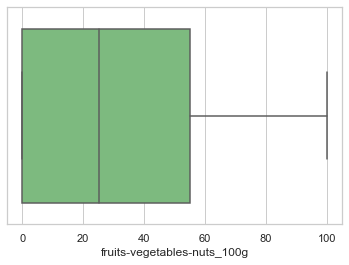

In [249]:
#-----------------------------------------------------------------------------------------------------------------
#
# Plus de 97% des données étaient manquantes.
#
# fruits-vegetables-nuts_100_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette = "Greens");


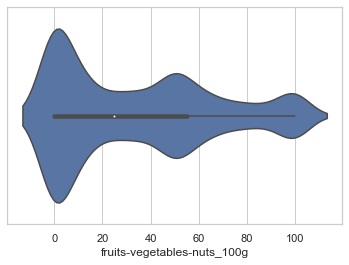

In [254]:
#-----------------------------------------------------------------------------------------------------------------
#
# fruits-vegetables-nuts_100 - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette = "deep");

In [255]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)

82.5


In [256]:
#-----------------------------------------------------------------------------------------------------------------
#
# L'indice 1.5 * (Q3 - Q1) donne une borne supérieur de 82.5 pour les valeurs. Le boxplot, 100
#
# Je prends seulement les valeur non nulles dans l'intervalle ]0; 100]
# 
#-----------------------------------------------------------------------------------------------------------------

df_aux2 = df_aux[ (df_aux[col_name]>0) & (df_aux[col_name]<=100) ]

df_aux2.describe()

,fruits-vegetables-nuts_100g
count,2212.000000
mean,47.579688
std,29.579806
min,1.000000
25%,21.800000
50%,50.000000
75%,65.000000
max,100.000000


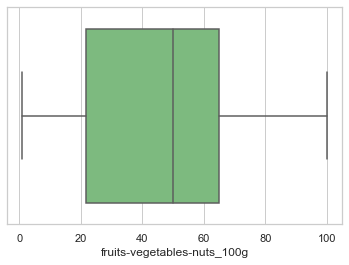

In [257]:
#-----------------------------------------------------------------------------------------------------------------
#
# fruits-vegetables-nuts_100g  - box plot # 2
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux2[col_name], palette="Greens");


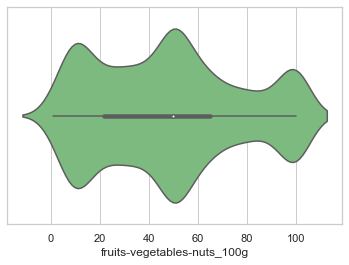

In [258]:
#-----------------------------------------------------------------------------------------------------------------
#
# fruits-vegetables-nut_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux2[col_name], palette = "Greens");


In [259]:
#-----------------------------------------------------------------------------------------------------------------
#
#  21eme colonne à analyser: cocoa_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'cocoa_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [260]:
#-----------------------------------------------------------------------------------------------------------------
#
# cocoa_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,cocoa_100g
count,1084.000000
mean,52.868819
std,19.266762
min,6.000000
25%,33.000000
50%,52.000000
75%,70.000000
max,100.000000


In [261]:
#-----------------------------------------------------------------------------------------------------------------
#
# cocoa_100g  - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')



 Colonne:  cocoa_100g 
 Total valeurs manquantes: 122061 
 Pctg  valeurs manquantes: 99.12


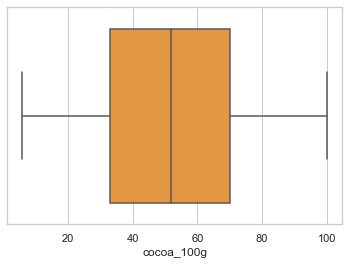

In [262]:
#-----------------------------------------------------------------------------------------------------------------
#
# Plus de 99% des données étaient manquantes.Le boxplot ci-dessous est très équilibré.
#
# cocoa_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette ="YlOrBr");


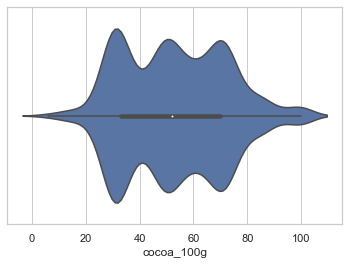

In [263]:
#-----------------------------------------------------------------------------------------------------------------
#
# fruits-vegetables-nuts_100 - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette = "deep");


In [264]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)

55.5


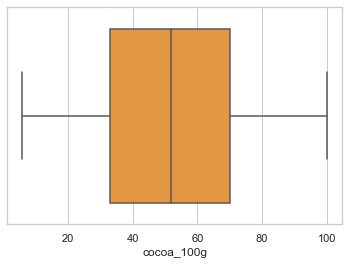

In [266]:
#-----------------------------------------------------------------------------------------------------------------
#
# Plus de 99% des données étaient manquantes.Le boxplot ci-dessous est très équilibré.
#
# cocoa_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette ="YlOrBr");


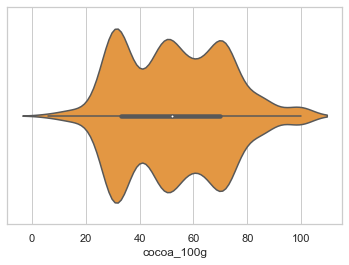

In [265]:
#-----------------------------------------------------------------------------------------------------------------
#
# L'indice 1.5 * (Q3 - Q1) donne une borne supérieur de 55.5  mais le boxplot ne montre pas des outliers.
#
# Étant donné la proximité entre la moyenne et la médiane, je considère judicieux
#
# de laisser l'ensemble de données intacte.
# 
#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------
#
# cocoa_100g  - violin plot
#
#-----------------------------------------------------------------------------------------------------------------

sns.violinplot(df_aux[col_name], palette ="YlOrBr");


In [271]:
#-----------------------------------------------------------------------------------------------------------------
#
#  22eme colonne à analyser: nutrition-score-fr_100g
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'nutrition-score-fr_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [272]:
#-----------------------------------------------------------------------------------------------------------------
#
# nutrition-score-fr_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,nutrition-score-fr_100g
count,93027.000000
mean,8.856859
std,8.901751
min,-15.000000
25%,1.000000
50%,9.000000
75%,15.000000
max,40.000000


In [273]:
#-----------------------------------------------------------------------------------------------------------------
#
# nutrition-score-fr_100g - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}','\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  nutrition-score-fr_100g 
 Total valeurs manquantes: 30118 
 Pctg  valeurs manquantes: 24.46


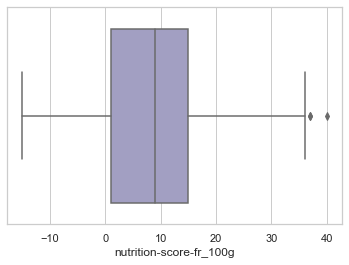

In [206]:
#-----------------------------------------------------------------------------------------------------------------
#
# Presque 25% des produits vendus en France n'ont pas de nutriscore
#
# nutrition-score-fr_100g  - box plot #1
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette = "Purples");


In [274]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


21.0


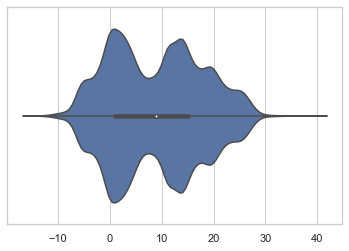

In [280]:
#-----------------------------------------------------------------------------------------------------------------
#
# L'indice 1.5 * (Q3 - Q1) donne une borne supérieur de 21 pour les valeurs. Le boxplot, une borne superieur de 40.
#
# Étant donné la proximité entre la moyenne et la médiane, je considère judicieux
#
# de ne pas reduire le dataframe bien qu'il semble avoir des outliers (pas de grand impact, à mon avis).
#
# On va le voir mieux dans les graphiques suivants
#
#-----------------------------------------------------------------------------------------------------------------

#fig, axs = plt.subplots(nrows=3, figsize=(10, 8))

sns.violinplot(df_aux[[col_name]], palette="deep");

#sns.boxenplot(df_aux[[col_name]], ax=axs[2])


In [281]:
#-----------------------------------------------------------------------------------------------------------------
#
#  23eme colonne à analyser: nutrition-score-uk_100g
#
# Je garde cette colonne afin de faire des comparaisons entre le score français et le britannique.
#
#-----------------------------------------------------------------------------------------------------------------

col_name = 'nutrition-score-uk_100g'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]


123145

In [282]:
#-----------------------------------------------------------------------------------------------------------------
#
# nutrition-score-uk_100g  - Statistique descriptive
#
#-----------------------------------------------------------------------------------------------------------------

df_aux.describe()


,nutrition-score-uk_100g
count,93027.000000
mean,8.411526
std,9.217996
min,-15.000000
25%,1.000000
50%,7.000000
75%,16.000000
max,37.000000


In [285]:
#-----------------------------------------------------------------------------------------------------------------
#
# nutrition-score-uk_100g - Nombre et pourcentage de valeurs manquantes
#
#-----------------------------------------------------------------------------------------------------------------

ttl_msng = df_aux[col_name].isna().sum()

pct_msng = ( ttl_msng / df_aux.shape[0]) * 100

print(' Colonne: ',col_name,'\n',f'Total valeurs manquantes: {ttl_msng:.0f}',
      '\n',f'Pctg  valeurs manquantes: {pct_msng:.2f}')


 Colonne:  nutrition-score-uk_100g 
 Total valeurs manquantes: 30118 
 Pctg  valeurs manquantes: 24.46


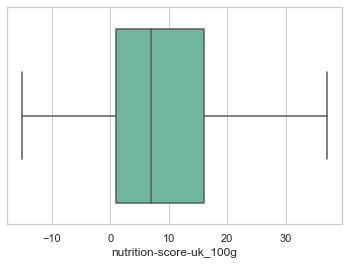

In [286]:
#-----------------------------------------------------------------------------------------------------------------
#
# Comme dans le cas précédent,du nutriscore français, presque 25% des produits n'ont pas de score britannique
#
# nutrition-score-fr_100g  - box plot #1 - pas de outliers visiblement 
#
#-----------------------------------------------------------------------------------------------------------------

sns.boxplot(df_aux[col_name], palette ="BuGn");
    

In [287]:
#-----------------------------------------------------------------------------------------------------------------
#
# Calcul de l'indice K * (Q3 - Q1) 
#
#-----------------------------------------------------------------------------------------------------------------

Q = df_aux[col_name].quantile([.25,.75])

Indice = (Q[0.75]- Q[0.25])*1.5

print(Indice)


22.5


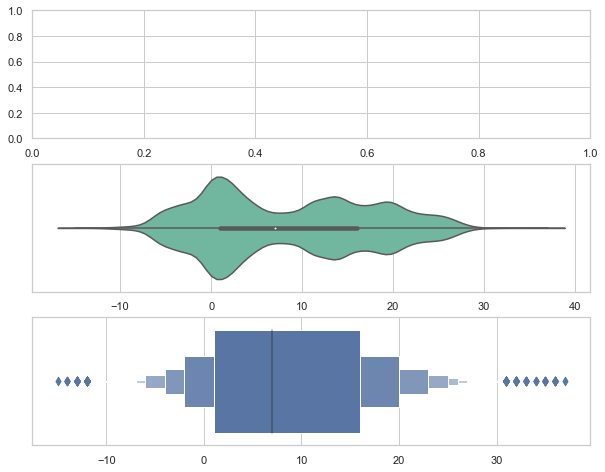

In [288]:
#-----------------------------------------------------------------------------------------------------------------
#
# L'indice 1.5 * (Q3 - Q1) donne une borne supérieur de 22.5 pour les valeurs. Le boxplot, une borne superieur de 40.
#
# Étant donné la proximité entre la moyenne et la médiane, je considère judicieux
#
# de ne pas reduire le dataframe bien qu'il semble avoir des outliers (pas de grand impact, à mon avis).
#
# On va le voir mieux dans les graphiques suivants
#
#-----------------------------------------------------------------------------------------------------------------

fig, axs = plt.subplots(nrows=3, figsize=(10, 8));

sns.violinplot(df_aux[[col_name]], ax=axs[1], palette = "BuGn");

sns.boxenplot(df_aux[[col_name]], ax=axs[2]);

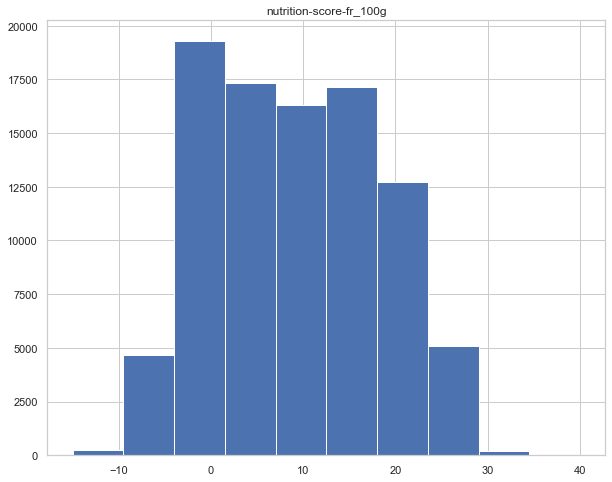

In [289]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyse plus détaillé du Nutriscore FRANCE 
#
#  Histogram NUTRISCORE FRANCE Nº 1
#
#--------------------------------------------------------------------------------------------------------------

col_name = 'nutrition-score-fr_100g'

df_aux = food_data[['code',col_name]]

fig, ax = plt.subplots(figsize=(10, 8));

df_aux[[col_name]].hist(ax=ax);


array([<matplotlib.axes._subplots.AxesSubplot object at 0x052A63F0>],
      dtype=object)

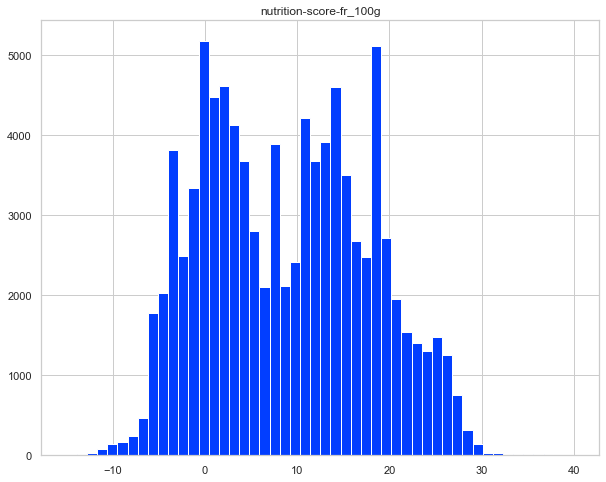

In [218]:
#--------------------------------------------------------------------------------------------------------------
#
#  Le graphique semble un peux biasé vers le milieu. On voit plus clairement 
#  le comportement autour du centre.
#
#  Histogram NUTRISCORE FRANCE Nº 2
#
#--------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(10, 8))

df_aux[[col_name]].hist(ax=ax, bins=50)


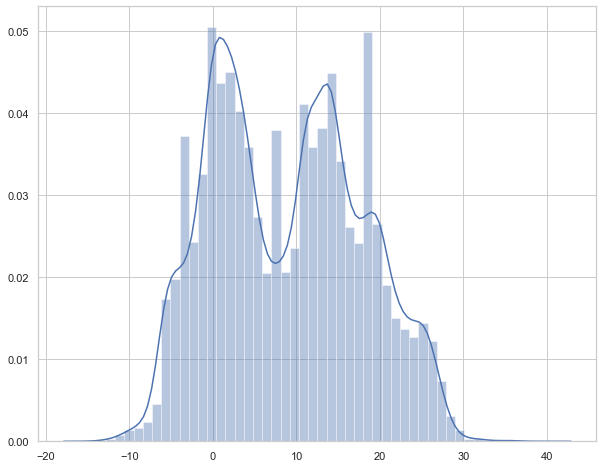

In [293]:
#--------------------------------------------------------------------------------------------------------------
#
#  Un graphique de dstribution Seaborn avec un histogram and KDE, et un rug plot.
#
#  Le nutriscore france semble être bi-modale
#
#  Histogram NUTRISCORE FRANCE Nº 3
#
#--------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(10, 8))

sns.distplot(df_aux[[col_name]], rug=False, ax=ax);


In [296]:
#--------------------------------------------------------------------------------------------------------------
#
#  On peut tester si NutriScore France suit une dist normale ou pas (ScPy Library).
#
#  Le nutriscore france semble être bi-modale.
#
#  Le test Kolmogorv-Smirnov peut evaluer si la distribution est proche d'une normale.
#
#  Ce test retourne une p-value. 
#
#  Si c'est inférieur à 0.05, les données ne suivent pas une dist normale
#
#  TEST KOLMOGOROV-SMIRNOV 
#
#--------------------------------------------------------------------------------------------------------------

col_name = 'nutrition-score-fr_100g'

df_aux = food_data[[col_name]]

df_aux = df_aux.dropna()  # on élimine les registres nuls

# On choisit 10 000 (~10% de la totalité de registres) pour le test KS

df_random_FR = df_aux[col_name].sample(n=10000)

print('Ready')


Ready


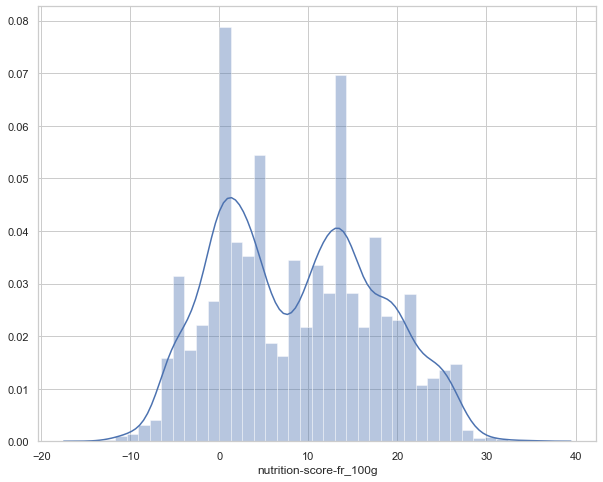

In [297]:
#----------------------------------------------------------------------------------
#
# On constate qua la distribution garde un peu la même forme sur l'échantillon
#
#-----------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(10, 8))

sns.distplot(df_random_FR, rug=False, ax=ax);


In [298]:
#------------------------------------------------------------------------------------
#
#  TEST KOLMOGOROV-SMIRNOV 
#
#  Le pvalue est inférieur à 0.5. Donc nutrition_score_fr_100g ne suit pas une 
#  dsitribution normale.
#  
#------------------------------------------------------------------------------------

stats.kstest(df_random_FR, 'norm')

KstestResult(statistic=0.7154498680518209, pvalue=0.0)

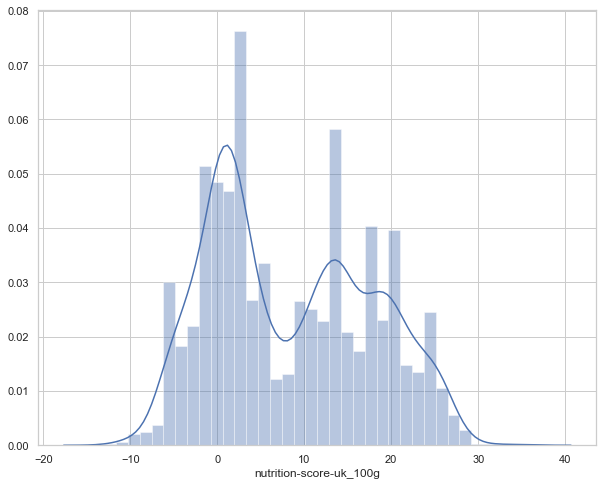

In [299]:
#------------------------------------------------------------------------------------
#
#  TEST KOLMOGOROV-SMIRNOV 
#
#  On peut vérifier si nutrition_score_uk_100g et nutrition_score_fr_100g
#  suivent une distribution similaire.
#
#  On procédera de la même façon. On choisira 10 000 registres au hasard. On
#  étudiera ensuite leur distributio et, enfin, on passera le test KS aux deux
#  échantillons.
#
#------------------------------------------------------------------------------------

col_name = 'nutrition-score-uk_100g'

df_aux = food_data[[col_name]]

df_aux = df_aux.dropna()    # on élimine les registres nuls

# On choisit 10 000 (~10% de la totalité de registres) pour le test KS

df_random_UK = df_aux[col_name].sample(n=10000)

fig, ax = plt.subplots(figsize=(10, 8))

sns.distplot(df_random_UK, rug=False, ax=ax);


In [300]:
#------------------------------------------------------------------------------------
#
#  TEST KOLMOGOROV-SMIRNOV pour nutrition_score_FR et nutrition_score_UK
#
#  Le pvalue est très bas. Donc nutrition_score_fr_100g  et nutrition_score_uk_100g
#  ne suivent pas la même distribution sur un echantillon de 10% de la population.
#  
#------------------------------------------------------------------------------------

stats.ks_2samp(df_random_FR, df_random_UK)

Ks_2sampResult(statistic=0.0597, pvalue=6.515554822048755e-16)

In [301]:
#--------------------------------------------------------------------------------------------------------------
#
#  On peut tester si NutriScore France est en correlation avec Nutriscore UK
#
#  Les deux scores semblent avoir un comportement similaire.
#
#--------------------------------------------------------------------------------------------------------------

col_name1 = 'nutrition-score-fr_100g'

col_name2 = 'nutrition-score-uk_100g'

df_aux = food_data[['code',col_name1, col_name2]]

df_aux = df_aux.dropna()

df_aux = df_aux.reset_index(drop=True)

df_aux.describe().T


,count,mean,std,min,25%,50%,75%,max
nutrition-score-fr_100g,93027.0,8.856859,8.901751,-15.0,1.0,9.0,15.0,40.0
nutrition-score-uk_100g,93027.0,8.411526,9.217996,-15.0,1.0,7.0,16.0,37.0


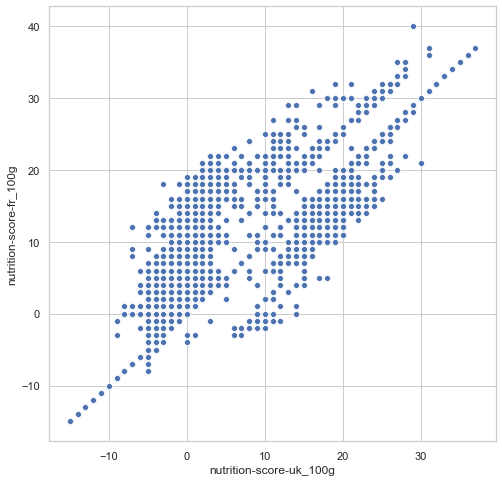

In [303]:
#--------------------------------------------------------------------------------------------------------------
#
#  Bien que proches, les deux indices ne sont pas identiques.
#
#  Scatter Plot des deux scores
#
#--------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(8, 8))

g = sns.scatterplot(x=col_name2, y=col_name1, data=df_aux, palette = "bright");


In [306]:
#--------------------------------------------------------------------------------------------------------------
#
#  La covariance entre NutriScore France et NutriScore UK
#
#--------------------------------------------------------------------------------------------------------------

covariance = cov(df_aux[col_name1],df_aux[col_name2])

print(covariance)


[[79.24117915 78.0276576 ]
 [78.0276576  84.97145489]]


In [307]:
#--------------------------------------------------------------------------------------------------------------
#
#  Le test Pearson de correlation nous dit comment une valeur a un impact sur l'autre
#
#  Il oscille entre -1 and 1.
#
# In this case, we can see that there is a strong correlation between city mileage and highway mileage.
# As you get better city mileage, you tend to get better highway mileage.
#
#--------------------------------------------------------------------------------------------------------------res = sns.lmplot(

corr = pearsonr(df_aux[col_name1], df_aux[col_name2])

print(f'La correlation de Pearson: {corr[0]:.3f}')


La correlation de Pearson: 0.951


In [359]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyses de correlation entre salt_100g et sodium_100g
#
#--------------------------------------------------------------------------------------------------------------

col_name1 = 'salt_100g'

col_name2 = 'sodium_100g'

df_aux = food_data[['code',col_name1, col_name2]]

df_aux = df_aux.dropna()

df_aux = df_aux.reset_index(drop=True)

df_aux.describe().T

,count,mean,std,min,25%,50%,75%,max
salt_100g,94633.0,1.162758,4.391360,0.0,0.0508,0.50000,1.210000,100.000000
sodium_100g,94633.0,0.457779,1.728882,0.0,0.0200,0.19685,0.476378,39.370079


In [360]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyses de correlation entre salt_100g et sodium_100g
#
#--------------------------------------------------------------------------------------------------------------

corr = np.corrcoef(df_aux['salt_100g'], df_aux['sodium_100g'])

print(f'Correlation salt_100g / sodium_100g : {corr[0,1]:2.3}')

Correlation salt_100g / sodium_100g : 1.0


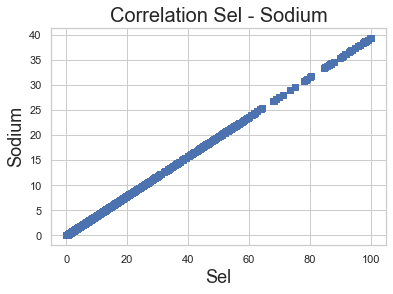

In [362]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyses de correlation entre salt_100g et sodium_100g
#
#--------------------------------------------------------------------------------------------------------------

plt.scatter(df_aux['salt_100g'], df_aux['sodium_100g'], marker='s')

plt.xlabel("Sel", fontsize=18)

plt.ylabel("Sodium", fontsize=18)

plt.title('Correlation Sel - Sodium', fontsize=20)
                   
plt.show()


In [336]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyses de correlation entre NutriScore et les facteurs dont il depend
#
#--------------------------------------------------------------------------------------------------------------
#
#  Facteurs "négatifs":
#                    energy_100g
#                    sugars_100g
#                    saturated-fat_100g
#                    sodium_100g
#
#  Les seuils des facteurs suivants changent pour les boissons:
#                    sugars_100g
#                    energy-kj_100g
#
#  Les seuils des facteurs suivants changent pour les matières grasses:
#                    saturated-fat_100g
#
#--------------------------------------------------------------------------------------------------------------
#
#  Facteurs "positifs":
#                    fruits-vegetables-nuts100g
#                    fibers_100g
#                    proteines_100g
#
#  Les seuils des facteurs suivants changent pour les boissons:
#                    fruits-vegetables-nuts100g
#
#--------------------------------------------------------------------------------------------------------------


In [381]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyses de correlation entre NutriScore et energy_100g
#
#--------------------------------------------------------------------------------------------------------------

col_name1 = 'nutrition-score-fr_100g'

col_name2 = 'energy_100g'

df_aux = food_data[['code',col_name1, col_name2]]

df_aux = df_aux.dropna()

df_aux = df_aux.reset_index(drop=True)

df_aux.describe().T

,count,mean,std,min,25%,50%,75%,max
nutrition-score-fr_100g,92950.0,8.864303,8.901648,-15.0,1.0,9.0,15.0,40.0
energy_100g,92950.0,1121.859228,780.196529,0.0,435.0,1046.0,1660.0,6276.0


In [383]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyses de correlation entre Nutriscore et energy_100g
#
#--------------------------------------------------------------------------------------------------------------

corr = np.corrcoef(df_aux[col_name1], df_aux[col_name2])

print(f'Correlation Nutriscore / energy_100g : {corr[0,1]:2.3}')


Correlation Nutriscore / energy_100g : 0.588


Text(0.5, 1.0, 'Correlation Nutriscore - Energy_100g')

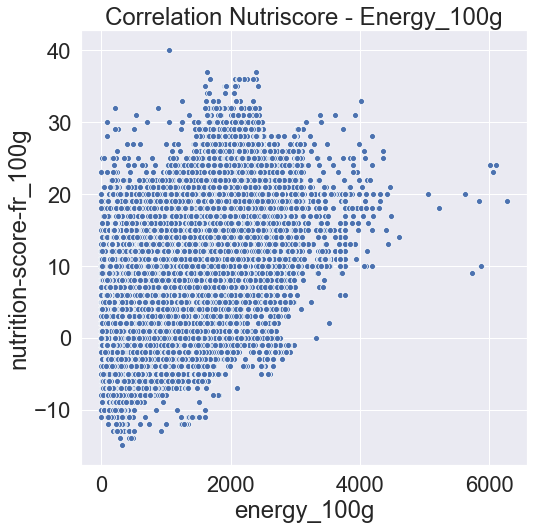

In [384]:
#--------------------------------------------------------------------------------------------------------------
#
#  Scatter Plot NutriScore et energy_100g
#
#--------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(8, 8))

sns.set(font_scale=2)

g = sns.scatterplot(x=col_name2, y=col_name1, data=df_aux)

g.axes.set_title("Correlation Nutriscore - Energy_100g")


In [385]:
#--------------------------------------------------------------------------------------------------------------
#
#  La covariance entre NutriScore France et energy_100g
#
#--------------------------------------------------------------------------------------------------------------

covariance = cov(df_aux[col_name1],df_aux[col_name2])

print(covariance)


[[7.92393405e+01 4.08400204e+03]
 [4.08400204e+03 6.08706623e+05]]


In [386]:
#--------------------------------------------------------------------------------------------------------------
#
#  Le test Pearson de correlation nous dit comment une valeur a un impact sur l'autre
#
#  Il oscille entre -1 and 1.
#
#--------------------------------------------------------------------------------------------------------------

corr = pearsonr(df_aux[col_name1], df_aux[col_name2])

print(f'La correlation de Pearson: {corr[0]:.3f}')


La correlation de Pearson: 0.588


In [387]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyses de correlation entre NutriScore et sodium_100g
#
#--------------------------------------------------------------------------------------------------------------
#

col_name1 = 'nutrition-score-fr_100g'

col_name2 = 'sodium_100g'

df_aux = food_data[['code',col_name1, col_name2]]

df_aux = df_aux.dropna()

df_aux = df_aux.reset_index(drop=True)

df_aux.describe().T


,count,mean,std,min,25%,50%,75%,max
nutrition-score-fr_100g,92950.0,8.864303,8.901648,-15.0,1.000000,9.0,15.000000,40.000000
sodium_100g,92950.0,0.434124,1.584476,0.0,0.023622,0.2,0.476378,39.370079


Text(0.5, 1.0, 'Correlation Nutriscore - Sodium_100g')

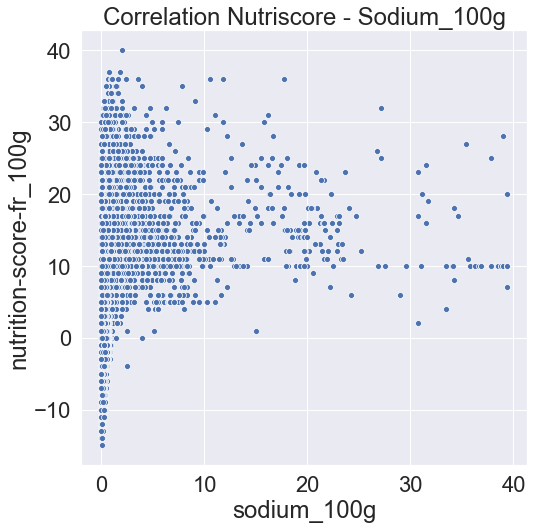

In [388]:
#--------------------------------------------------------------------------------------------------------------
#
#  Scatter Plot NutriScore et sodium_100g
#
#--------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(8, 8))

g = sns.scatterplot(x=col_name2, y=col_name1, data=df_aux)

g.axes.set_title("Correlation Nutriscore - Sodium_100g")


In [389]:
#--------------------------------------------------------------------------------------------------------------
#
#  La covariance entre NutriScore France et sodium_100g
#
#--------------------------------------------------------------------------------------------------------------

covariance = cov(df_aux[col_name1],df_aux[col_name2])

print(covariance)


[[79.23934048  1.59135311]
 [ 1.59135311  2.51056532]]


In [390]:
#--------------------------------------------------------------------------------------------------------------
#
#  Le test Pearson de correlation nous dit comment une valeur a un impact sur l'autre
#
#  Il oscille entre -1 and 1.
#
#--------------------------------------------------------------------------------------------------------------

corr = pearsonr(df_aux[col_name1], df_aux[col_name2])

print(f'La correlation de Pearson: {corr[0]:.3f}')


La correlation de Pearson: 0.113


In [392]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyses de correlation entre NutriScore et sugars_100g
#
#--------------------------------------------------------------------------------------------------------------
#

col_name1 = 'nutrition-score-fr_100g'

col_name2 = 'sugars_100g'

df_aux = food_data[['code',col_name1, col_name2]]

df_aux = df_aux.dropna()

df_aux = df_aux.reset_index(drop=True)

df_aux.describe().T


,count,mean,std,min,25%,50%,75%,max
nutrition-score-fr_100g,93027.0,8.856859,8.901751,-15.0,1.0,9.0,15.0,40.0
sugars_100g,93027.0,13.427932,19.126525,0.0,1.0,4.1,18.0,145.0


Text(0.5, 1.0, 'Correlation Nutriscore - Sugars_100g')

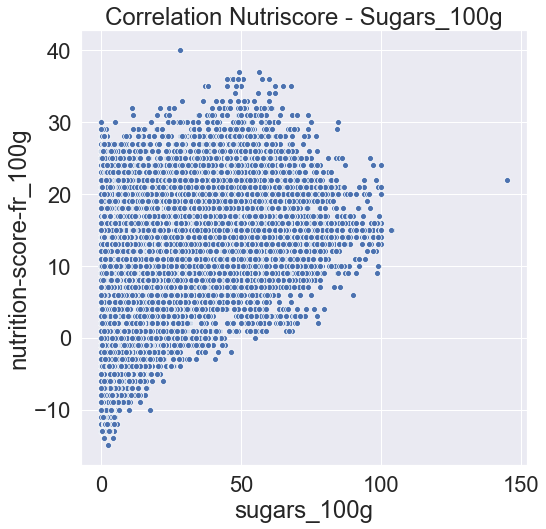

In [393]:
#--------------------------------------------------------------------------------------------------------------
#
#  Scatter Plot  NutriScore et sugars_100g
#
#--------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(8, 8))

g = sns.scatterplot(x=col_name2, y=col_name1, data=df_aux)

g.axes.set_title("Correlation Nutriscore - Sugars_100g")


In [394]:
#--------------------------------------------------------------------------------------------------------------
#
#  La covariance entre NutriScore France et sugars_100g
#
#--------------------------------------------------------------------------------------------------------------

covariance = cov(df_aux[col_name1],df_aux[col_name2])

print(covariance)


[[ 79.24117915  74.57316355]
 [ 74.57316355 365.82397587]]


In [395]:
#--------------------------------------------------------------------------------------------------------------
#
#  Le test Pearson de correlation nous dit comment une valeur a un impact sur l'autre
#
#  Il oscille entre -1 and 1.
#
#--------------------------------------------------------------------------------------------------------------

corr = pearsonr(df_aux[col_name1], df_aux[col_name2])

print(f'La correlation de Pearson: {corr[0]:.3f}')

La correlation de Pearson: 0.438


In [396]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyses de correlation entre NutriScore et saturated-fat_100g
#
#--------------------------------------------------------------------------------------------------------------
#

col_name1 = 'nutrition-score-fr_100g'

col_name2 = 'saturated-fat_100g'

df_aux = food_data[['code',col_name1, col_name2]]

df_aux = df_aux.dropna()

df_aux = df_aux.reset_index(drop=True)

df_aux.describe().T


,count,mean,std,min,25%,50%,75%,max
nutrition-score-fr_100g,92950.0,8.864303,8.901648,-15.0,1.0,9.0,15.0,40.0
saturated-fat_100g,92950.0,5.250969,8.267466,0.0,0.3,1.9,7.1,100.0


Text(0.5, 1.0, 'Correlation Nutriscore - Saturated-fat_100g')

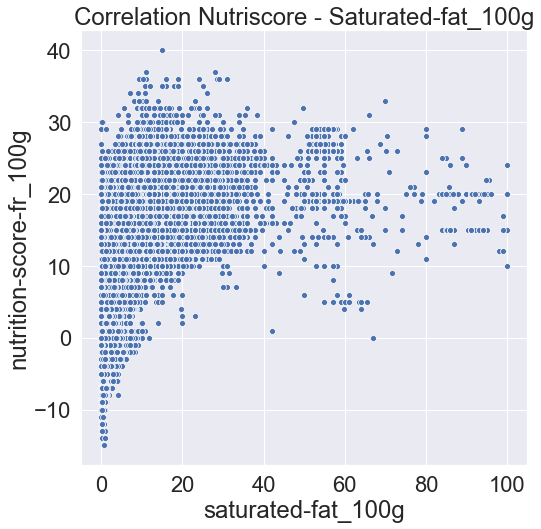

In [397]:
#--------------------------------------------------------------------------------------------------------------
#
#  Scatter Plot  NutriScore et saturated-fat_100g
#
#--------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(8, 8))

g = sns.scatterplot(x=col_name2, y=col_name1, data=df_aux)

g.axes.set_title("Correlation Nutriscore - Saturated-fat_100g")


In [398]:
#--------------------------------------------------------------------------------------------------------------
#
#  La covariance entre NutriScore France et saturated-fat_100g
#
#--------------------------------------------------------------------------------------------------------------

covariance = cov(df_aux[col_name1],df_aux[col_name2])

print(covariance)


[[79.23934048 43.30928935]
 [43.30928935 68.35098911]]


In [399]:
#--------------------------------------------------------------------------------------------------------------
#
#  Le test Pearson de correlation nous dit comment une valeur a un impact sur l'autre
#
#  Il oscille entre -1 and 1.
#
#--------------------------------------------------------------------------------------------------------------

corr = pearsonr(df_aux[col_name1], df_aux[col_name2])

print(f'La correlation de Pearson: {corr[0]:.3f}')

La correlation de Pearson: 0.588


In [401]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyses de correlation entre NutriScore et fruits-vegetables-nuts_100g
#
#--------------------------------------------------------------------------------------------------------------

col_name1 = 'nutrition-score-fr_100g'

col_name2 = 'fruits-vegetables-nuts_100g'

df_aux = food_data[['code',col_name1, col_name2]]

df_aux = df_aux.dropna()

df_aux = df_aux.reset_index(drop=True)

df_aux.describe().T


,count,mean,std,min,25%,50%,75%,max
nutrition-score-fr_100g,2960.0,6.606757,7.852998,-12.0,0.0,5.0,12.0,31.0
fruits-vegetables-nuts_100g,2960.0,32.524686,33.135541,0.0,0.0,24.0,54.0,100.0


Text(0.5, 1.0, 'Correlation Nutriscore - Fruits-vegetables-nuts__100g')

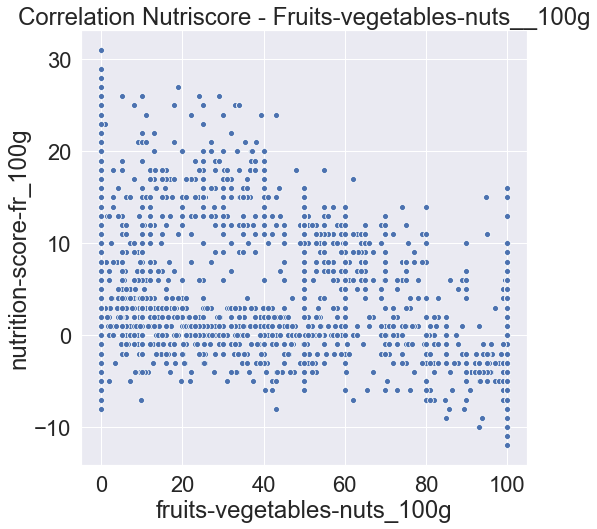

In [402]:
#--------------------------------------------------------------------------------------------------------------
#
#  Scatter Plot  NutriScore et fruits-vegetables-nuts_100g
#
#--------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(8, 8))

g = sns.scatterplot(x=col_name2, y=col_name1, data=df_aux)

g.axes.set_title("Correlation Nutriscore - Fruits-vegetables-nuts__100g")


In [403]:
#--------------------------------------------------------------------------------------------------------------
#
#  La covariance entre NutriScore France et saturated-fat_100g
#
#--------------------------------------------------------------------------------------------------------------

covariance = cov(df_aux[col_name1],df_aux[col_name2])

print(covariance)


[[  61.66957245  -84.32268527]
 [ -84.32268527 1097.96408385]]


In [404]:
#--------------------------------------------------------------------------------------------------------------
#
#  Le test Pearson de correlation nous dit comment une valeur a un impact sur l'autre
#
#  Il oscille entre -1 and 1.
#
#--------------------------------------------------------------------------------------------------------------

corr = pearsonr(df_aux[col_name1], df_aux[col_name2])

print(f'La correlation de Pearson: {corr[0]:.3f}')


La correlation de Pearson: -0.324


In [405]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyses de correlation entre NutriScore et fiber_100g
#
#--------------------------------------------------------------------------------------------------------------
#

col_name1 = 'nutrition-score-fr_100g'

col_name2 = 'fiber_100g'

df_aux = food_data[['code',col_name1, col_name2]]

df_aux = df_aux.dropna()

df_aux = df_aux.reset_index(drop=True)

df_aux.describe().T


,count,mean,std,min,25%,50%,75%,max
nutrition-score-fr_100g,93027.0,8.856859,8.901751e+00,-15.0,1.0,9.0,15.0,4.000000e+01
fiber_100g,93027.0,911760.281244,2.780893e+08,0.0,0.0,0.0,2.3,8.481815e+10


Text(0.5, 1.0, 'Correlation Nutriscore - Fiber__100g')

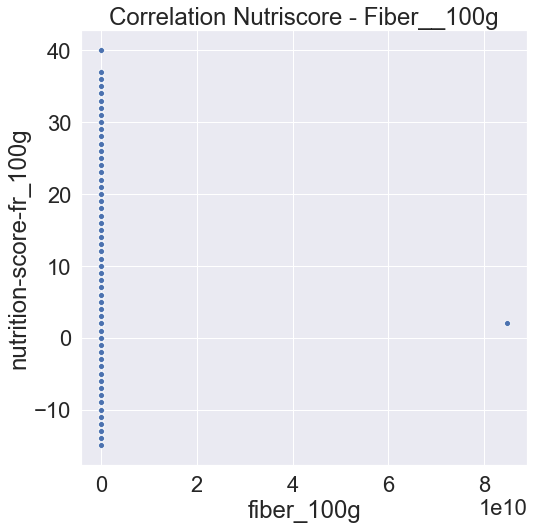

In [406]:
#--------------------------------------------------------------------------------------------------------------
#
#  Scatter Plot  NutriScore et fiber_100g
#
#--------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(8, 8))

g = sns.scatterplot(x=col_name2, y=col_name1, data=df_aux)

g.axes.set_title("Correlation Nutriscore - Fiber__100g")


In [407]:
#--------------------------------------------------------------------------------------------------------------
#
#  La covariance entre NutriScore France et fiber_100g
#
#--------------------------------------------------------------------------------------------------------------

covariance = cov(df_aux[col_name1],df_aux[col_name2])

print(covariance)

[[ 7.92411791e+01 -6.25187230e+06]
 [-6.25187230e+06  7.73336619e+16]]


In [408]:
#--------------------------------------------------------------------------------------------------------------
#
#  Le test Pearson de correlation nous dit comment une valeur a un impact sur l'autre
#
#  Il oscille entre -1 and 1.
#
#--------------------------------------------------------------------------------------------------------------

corr = pearsonr(df_aux[col_name1], df_aux[col_name2])

print(f'La correlation de Pearson: {corr[0]:.3f}')

La correlation de Pearson: -0.003


In [409]:
#--------------------------------------------------------------------------------------------------------------
#
#  Analyses de correlation entre NutriScore et proteins_100g
#
#--------------------------------------------------------------------------------------------------------------
#

col_name1 = 'nutrition-score-fr_100g'

col_name2 = 'proteins_100g'

df_aux = food_data[['code',col_name1, col_name2]]

df_aux = df_aux.dropna()

df_aux = df_aux.reset_index(drop=True)

df_aux.describe().T


,count,mean,std,min,25%,50%,75%,max
nutrition-score-fr_100g,93027.0,8.856859,8.901751,-15.0,1.0,9.0,15.0,40.0
proteins_100g,93027.0,7.790412,8.356485,0.0,1.6,5.9,11.0,305.0


Text(0.5, 1.0, 'Correlation Nutriscore - Proteins__100g')

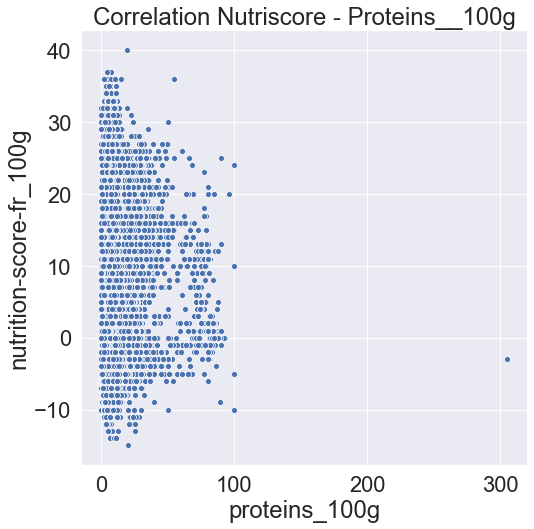

In [410]:
#--------------------------------------------------------------------------------------------------------------
#
#  Scatter Plot  NutriScore et proteins_100g
#
#--------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(8, 8))

g = sns.scatterplot(x=col_name2, y=col_name1, data=df_aux, palette ="deep")

g.axes.set_title("Correlation Nutriscore - Proteins__100g")


In [411]:
#--------------------------------------------------------------------------------------------------------------
#
#  La covariance entre NutriScore France et proteins_100g
#
#--------------------------------------------------------------------------------------------------------------

covariance = cov(df_aux[col_name1],df_aux[col_name2])

print(covariance)


[[79.24117915  5.90983189]
 [ 5.90983189 69.83084188]]


In [412]:
#--------------------------------------------------------------------------------------------------------------
#
#  Le test Pearson de correlation nous dit comment une valeur a un impact sur l'autre
#
#  Il oscille entre -1 and 1.
#
#--------------------------------------------------------------------------------------------------------------

corr = pearsonr(df_aux[col_name1], df_aux[col_name2])

print(f'La correlation de Pearson: {corr[0]:.3f}')


La correlation de Pearson: 0.079


In [413]:
#------------------------------------------------------------------------------------------
# Analyse sur les emballages plastiques
#
# Comptage par type d'emballage
#
#------------------------------------------------------------------------------------------

df_aux = food_data["packaging"].groupby(food_data["packaging"]).count().sort_values(ascending=False)

df_aux.describe


<bound method NDFrame.describe of packaging
Sachet,Plastique            2560
Carton                      1971
Plastique                   1907
Bouteille,Verre             1707
sachet,plastique            1413
                            ... 
Récipient sous pression        1
Récipient plastique            1
Round box                      1
Rouleau,carton,plastique       1
&quot;cup&quot;                1
Name: packaging, Length: 12588, dtype: int64>

In [414]:
food_data.columns

Index(['code', 'product_name', 'packaging', 'brands', 'categories',
       'countries', 'ingredients_text', 'allergens', 'traces',
       'nutrition_grade_fr', 'main_category', 'energy_100g',
       'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'omega-3-fat_100g', 'omega-6-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'starch_100g',
       'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'vitamin-d_100g',
       'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g',
       'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g',
       'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g',
       'pantothenic-acid_100g', 'bicarbonate_100g', 'potassium_100g',
       'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g',
       'magnesium_100g', 'zinc_1

In [437]:
#------------------------------------------------------------------------------------------
#
#  Pour faciliter le triage, je passe toute la colonne d'emballages à minuscules
#  dans un nouveau dataframe.
#  En suite on change tous les noms d'emballage à langue française
#
#------------------------------------------------------------------------------------------

df_aux = food_data[['code','packaging','nutrition_grade_fr']]

df_aux = df_aux[df_aux['packaging'].notna()]

df_aux['packaging'] = df_aux['packaging'].str.lower()

pl = ['plastic', 'plástico', 'plastico', 'plastik', 'plastique']

vr = ['glass', 'vidrio', 'verre', 'glass', 'vetro']

ct = ['carton', 'karton', 'cartone', 'cardboard']

cn = ['conserve', 'dose', 'lata', 'can', 'canette']

#------------------------------------------------------------------------
# Generate result using pandas une nouvelle colonne contenant 
# "plastique", "verre", "carton", "autre"
#------------------------------------------------------------------------

result = [] 

for i in range(0,len(df_aux)):
    aux = 'autre/aucun'
    packng = df_aux.iloc[i,1]
    if (packng != np.nan):
                    for e in pl:
                        if e in packng:
                           aux = 'plastique'
                    for e in vr:
                        if e in packng:
                            aux = 'verre'
                    for e in ct:
                        if e in packng:
                            aux = 'carton'
                    for e in cn:
                        if e in packng:
                            aux = 'metal'     
    result.append(aux)

df_aux['type_of_packaging'] = result

print('Ready')

Ready


In [438]:
pack_cnt = df_aux.groupby('type_of_packaging').count()

pack_cnt  = pack_cnt.reset_index()

pack_cnt = pack_cnt.drop('code',axis=1)

print(pack_cnt)

  type_of_packaging  packaging  nutrition_grade_fr
0       autre/aucun       7744                4437
1            carton      18700               15952
2             metal       5028                3761
3         plastique      28027               22049
4             verre       8525                4591


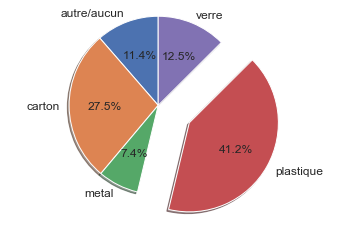

In [422]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = pack_cnt['type_of_packaging']
sizes = pack_cnt['packaging']
explode = (0, 0, 0, 0.4, 0)  # only "explode" the 4th slice (i.e. 'Plastique')

fig1, ax1 = plt.subplots()

ax1.pie(sizes,
        explode=explode, 
        labels=labels,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 12}
       )

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

   nutrition_grade_fr type_of_packaging  packaging
0                   a       autre/aucun        694
1                   a            carton       2819
2                   a             metal       1471
3                   a         plastique       3374
4                   a             verre        522
5                   b       autre/aucun        614
6                   b            carton       2463
7                   b             metal        888
8                   b         plastique       2620
9                   b             verre        501
10                  c       autre/aucun        828
11                  c            carton       3465
12                  c             metal        712
13                  c         plastique       4663
14                  c             verre       1392
15                  d       autre/aucun       1167
16                  d            carton       3932
17                  d             metal        405
18                  d         p

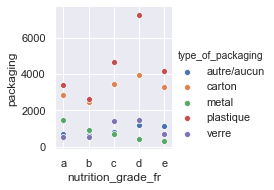

In [439]:

pack_cnt = df_aux.groupby(['nutrition_grade_fr','type_of_packaging']).count()

pack_cnt  = pack_cnt.reset_index()

pack_cnt = pack_cnt.drop('code',axis=1)

print(pack_cnt)

g = sns.pairplot(pack_cnt, 
                 hue="type_of_packaging",
                 x_vars='nutrition_grade_fr', 
                 y_vars='packaging')


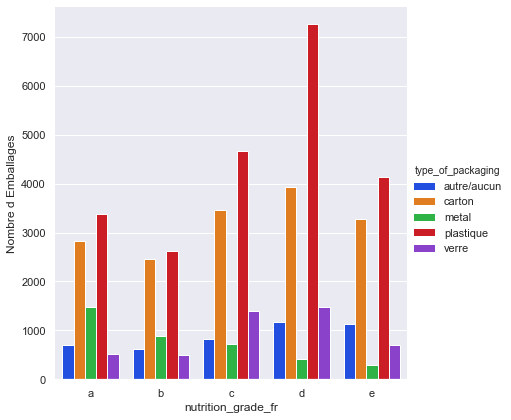

In [440]:

g = sns.catplot(x="nutrition_grade_fr",
                y="packaging", 
                hue="type_of_packaging",
                data=pack_cnt,
                height=6, 
                kind="bar",
                palette="bright");

g.despine(left=True);

g.set_ylabels("Nombre d Emballages");


In [452]:
#------------------------------------------------------------------------------------------
#
#  Analyse allergens - nutrition_grade_fr
#
#------------------------------------------------------------------------------------------

df_aux = food_data[['code','allergens','nutrition_grade_fr', 'nutrition-score-fr_100g']]

# Elimination de registres sans allergens

df_aux = df_aux[df_aux['allergens'].notna()]

df_aux.shape

(30731, 4)

In [453]:
df_aux['allergens'] = df_aux['allergens'].str.lower()

print(df_aux['allergens'])

9                            blé, beurre, oeufs, noisette
17                                               sulfites
27                                  blé, oeufs, blé, lait
29                                   blé, œufs, blé, lait
32                   œufs, amande, beurre, blé, œufs, blé
                               ...                       
123066    soja, soja noir, soja, soja noir, huile de soja
123069                                                blé
123075                                                blé
123096                                   cacahuetes, soja
123127                                                œuf
Name: allergens, Length: 30731, dtype: object


In [492]:
separator = ','

df_aux['allergens_list'] = df_aux['allergens'].str.split(separator)

for i in range(11,20):
    aux_list = df_aux.iloc[i,4]
    aux_list = [x.replace(" ","") for x in aux_list]
    aux_list = [x.strip() for x in aux_list]
    aux_set  = set(aux_list)
    aux_list = list(aux_set)
    df_aux["allergens_list"].iloc[i] = aux_list
    
print('Ready')


Ready


In [496]:
df_aux.columns

Index(['code', 'allergens', 'nutrition_grade_fr', 'nutrition-score-fr_100g',
       'allergens_list', 'nombre_d_allergens'],
      dtype='object')

In [495]:
result = [] 

for i in range(0,len(df_aux)):
    result.append(len(df_aux.iloc[i,4]))

df_aux['nombre_d_allergens'] = result

print(df_aux['nombre_d_allergens'])


9         4
17        1
27        4
29        4
32        6
         ..
123066    5
123069    1
123075    1
123096    2
123127    1
Name: nombre_d_allergens, Length: 30731, dtype: int64


In [497]:

del df_aux['allergens']
del df_aux['allergens_list']

df_aux.columns

Index(['code', 'nutrition_grade_fr', 'nutrition-score-fr_100g',
       'nombre_d_allergens'],
      dtype='object')

In [445]:
pack_cnt = df_aux.groupby(['nutrition_grade_fr']).sum()

In [498]:
pack_cnt = pack_cnt.reset_index()

   index nutrition_grade_fr  nombre_d_allergens
0      0                  a                8889
1      1                  b               13107
2      2                  c               22774
3      3                  d               29751
4      4                  e               24630


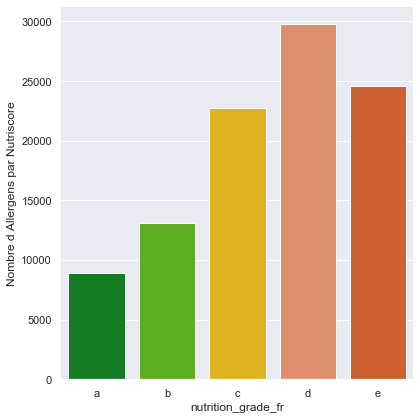

In [499]:
print(pack_cnt)

# Create an array with the colors you want to use

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

# Set your custom color palette

sns.set_palette(sns.color_palette(colors))

# Customize the axes and title
ax.set_title("Nutriscore vs Allergens")
ax.set_xlabel("Nutriscore")
ax.set_ylabel("Nombre de allergens")

g = sns.catplot(x="nutrition_grade_fr",
                y="nombre_d_allergens", 
                data=pack_cnt,
                height=6, 
                kind="bar"
               );

g.despine(left=True);

g.set_ylabels("Nombre d Allergens par Nutriscore");


In [503]:
df_aux_nan = df_aux[df_aux['nutrition-score-fr_100g'].notna()]

df_aux_nan.T

,27,29,32,33,54,55,56,58,60,61,...,123047,123048,123052,123054,123063,123066,123069,123075,123096,123127
code,000010,000030,000050,000051,00011686,00011693,00011709,00011730,00011754,00011778,...,9556041611978,9556041611992,9556041612661,9556041780612,9556156046399,9556156046955,9556417639339,9556587103869,96087770,9782803671168
nutrition_grade_fr,d,d,e,e,e,e,e,e,e,d,...,d,e,e,d,b,b,b,c,d,d
nutrition-score-fr_100g,12,13,22,22,21,26,21,22,20,18,...,13,21,20,14,0,0,2,10,15,13
nombre_d_allergens,4,4,6,6,5,6,8,5,7,5,...,7,6,2,1,2,5,1,1,2,1


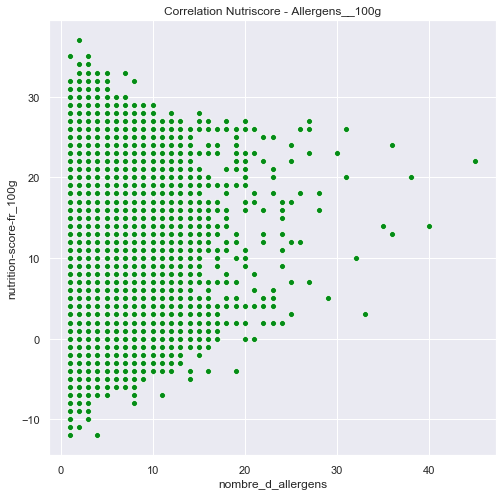

In [509]:
#------------------------------------------------------------------------------------------
#
#  Analyse correlation Nutriscore Allergens
#
#------------------------------------------------------------------------------------------

col_name1 = 'nombre_d_allergens'

col_name2 = 'nutrition-score-fr_100g'

fig, ax = plt.subplots(figsize=(8, 8))

g = sns.scatterplot(x=col_name1, y=col_name2, data=df_aux_nan, palette ="deep")

g.axes.set_title("Correlation Nutriscore - Allergens__100g");


In [512]:
#--------------------------------------------------------------------------------------------------------------
#
# Test de Pearson Nutriscore - allergens
#
#--------------------------------------------------------------------------------------------------------------

corr = pearsonr(df_aux_nan[col_name1], df_aux_nan[col_name2])

print(f'La correlation de Pearson: {corr[0]:.3f}')


La correlation de Pearson: 0.149


In [513]:
#------------------------------------------------------------------------------------------
#
#  Analyse categories - nutrition_grade_fr
#
#------------------------------------------------------------------------------------------

df_aux = food_data[['code','categories','nutrition_grade_fr']]

# Elimination de registres sans categories

df_aux = df_aux[df_aux['categories'].notna()]

df_aux.shape

(76510, 3)

In [514]:
df_aux['categories'] = df_aux['categories'].str.lower()

print(df_aux['categories'])

2                                             filet de bœuf
7         aliments et boissons à base de végétaux,alimen...
8         boissons,boissons gazeuses,sodas,boissons sucr...
9         snacks sucrés,biscuits et gâteaux,biscuits,sablés
10                        snacks sucrés,confiseries,bonbons
                                ...                        
123135                      biscottes au sarrasin,biscottes
123137    produits à tartiner,petit-déjeuners,produits à...
123139    boissons,boissons alcoolisées,vins,vins blancs...
123140                                           thés verts
123142    viandes,produits à tartiner,charcuteries,produ...
Name: categories, Length: 76510, dtype: object


In [515]:
df_aux['categories'].groupby(df_aux['categories']).count().sort_values(ascending=False).nlargest(10)

categories
en:beverages                                                       2368
en:fats                                                             715
en:milks                                                            311
snacks sucrés,biscuits et gâteaux,biscuits                          303
snacks sucrés,chocolats,chocolats noirs                             292
en:non-sugared-beverages, en:beverages                              247
biscuits                                                            241
snacks sucrés,biscuits et gâteaux,biscuits,biscuits au chocolat     239
viandes,charcuteries,jambons,jambons blancs                         226
bonbons                                                             194
Name: categories, dtype: int64

In [516]:
#------------------------------------------------------------------------------------------
#
#  Analyse brands - nutrition_grade_fr
#
#------------------------------------------------------------------------------------------

df_aux = food_data[['code','brands','nutrition_grade_fr']]

# Elimination de registres sans categories

df_aux = df_aux[df_aux['brands'].notna()]

df_aux.shape

(116802, 3)

In [517]:
df_aux['brands'] = df_aux['brands'].str.lower()

print(df_aux['brands'])

df_aux.columns


0               ferme t'y r'nao
1                   natura4ever
3                   natura4ever
6                twix, lundberg
7              bertrand lejeune
                  ...          
123139       roussette du bugey
123140                  lobodis
123142    sans marque,d.lambert
123143             leader price
123144                    knorr
Name: brands, Length: 116802, dtype: object


Index(['code', 'brands', 'nutrition_grade_fr'], dtype='object')

In [518]:

df_aux = df_aux[df_aux['nutrition_grade_fr'].notna()]

df_aux = df_aux[df_aux['brands'].notna()]

df_aux


,code,brands,nutrition_grade_fr
8,0000007020254,a&w,e
10,0000009336247,nerds,d
11,0000010068175,alice délice,c
14,0000010179413,alice délice,e
15,0000010187319,alice délice,d
...,...,...,...
123129,9782811635848,hiro mashima,b
123130,9782816154160,u bio,d
123131,9782848765297,monoprix gourmet,d
123135,9847548283004,le pain des fleurs,a


brands
carrefour       3077
auchan          2842
u               2316
casino          1855
leader price    1820
Name: brands, dtype: int64


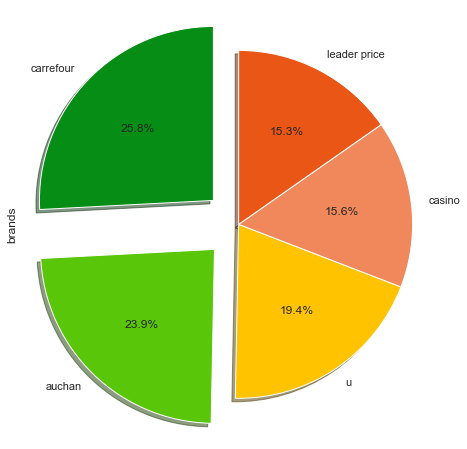

In [521]:

brand_cnt = df_aux['brands'].groupby(df_aux['brands']).count().sort_values(ascending=False).nlargest(5)

print(brand_cnt)

explode = [0.2, 0.2, 0, 0, 0]
plot = brand_cnt.plot.pie(y='brands', 
                          figsize=(16, 8), 
                          autopct='%1.1f%%',
                          explode = explode,
                          shadow=True, 
                          startangle=90
                         )


In [522]:
top_brands = ['auchan','carrefour', 'u', 'casino', 'leader price']
#              , 'monoprix', 'fleury michon', 'picard', 'cora', 'nestlé']

df_brands = food_data[['code','brands','nutrition_grade_fr']]

df_brands = df_brands.loc[food_data['brands'].isin(top_brands)]

print(df_brands)


                 code     brands nutrition_grade_fr
2400    0207970042188  carrefour                NaN
2422    0208655022709     casino                NaN
2676    0222353000821     casino                NaN
3970         11344476  carrefour                NaN
4096         13305956  carrefour                  c
...               ...        ...                ...
122691  9080281853657          u                NaN
122797  9274160695791     auchan                NaN
122801  9276482697057  carrefour                NaN
122808  9281215822675          u                NaN
122976  9427023678121          u                  d

[329 rows x 3 columns]


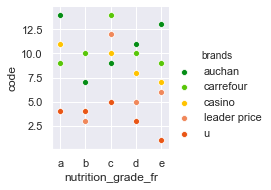

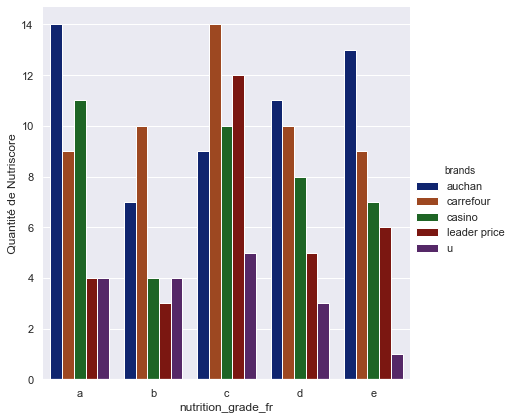

In [523]:
#df_brands = df_brands[df_brands['nutrition_grade_fr'].notna()]

brand_cnt = df_brands.groupby(['brands','nutrition_grade_fr']).count()

brand_cnt  = brand_cnt.reset_index()

g = sns.pairplot(brand_cnt, hue='brands',x_vars='nutrition_grade_fr',y_vars='code');

g = sns.catplot(x="nutrition_grade_fr",
                y="code",
                hue="brands",
                data=brand_cnt,
                height=6, 
                kind="bar",
                palette="dark");

g.despine(left=True)

g.set_ylabels(" Quantité de Nutriscore ")

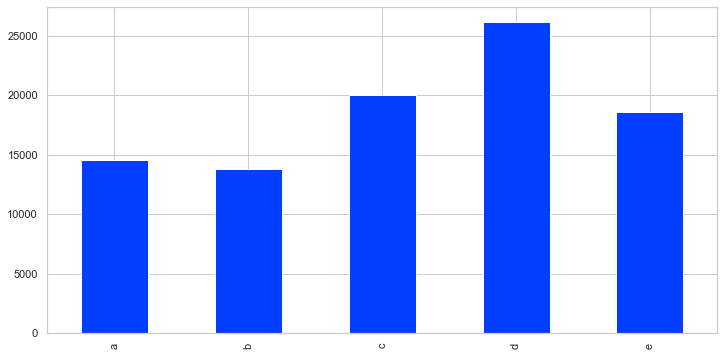

In [432]:
#-------------------------------------------------------------------------------
#
#  Histogram de Nutriscore Grade
#
#-------------------------------------------------------------------------------

col_name = 'nutrition_grade_fr'

df_aux = food_data[['code',col_name]]

df_aux.shape[0]

df_aux1 = df_aux[col_name].value_counts()

df_aux1.sort_index(axis=0, ascending=True, inplace=True, kind='quicksort')

x_labels = ['a', 'b', 'c', 'd', 'e']

df_aux1.plot( kind='bar', figsize=(12,6) );




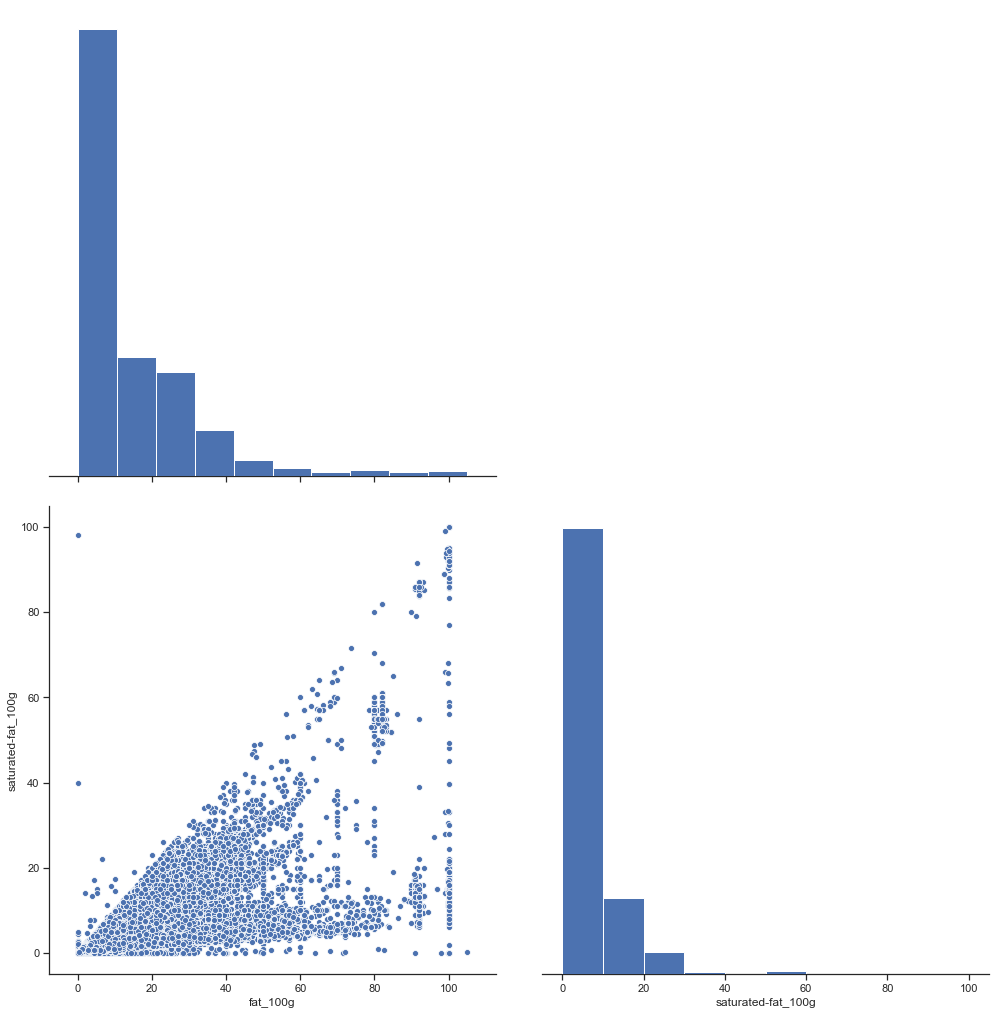

In [524]:
#----------------------------------------------------------------------------------------------------------------
#
# Pairplots - fat_100g <-> saturated-fat_100g
#
#----------------------------------------------------------------------------------------------------------------

col1 = 'fat_100g'

col2 = 'saturated-fat_100g'

paired_ds = food_data[['nutrition_grade_fr', col1, col2]]

paired_ds.columns

sns.set(style="ticks")

g = sns.pairplot(paired_ds, corner = True);

g.fig.set_size_inches(15,15)

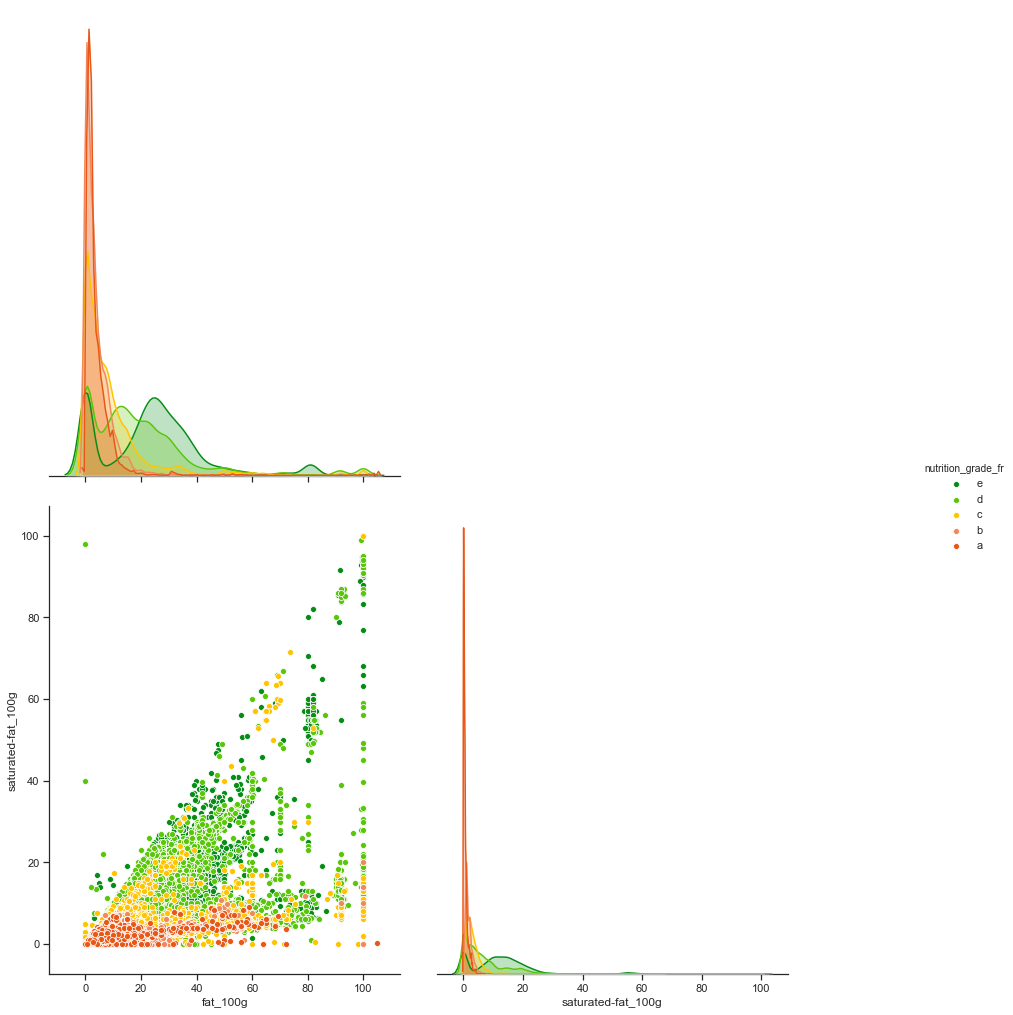

In [542]:
#----------------------------------------------------------------------------------------------------------------
#
# Pairplots - fat_100g <-> saturated-fat_100g  - Trié par NutriScore
#
#----------------------------------------------------------------------------------------------------------------

# Palette avec les couleurs du Nutriscore

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

sns.set(style="ticks")

g = sns.pairplot(paired_ds, 
                 hue = 'nutrition_grade_fr', 
                 corner=True,
                 palette = colors
                );

g.fig.set_size_inches(15,15)



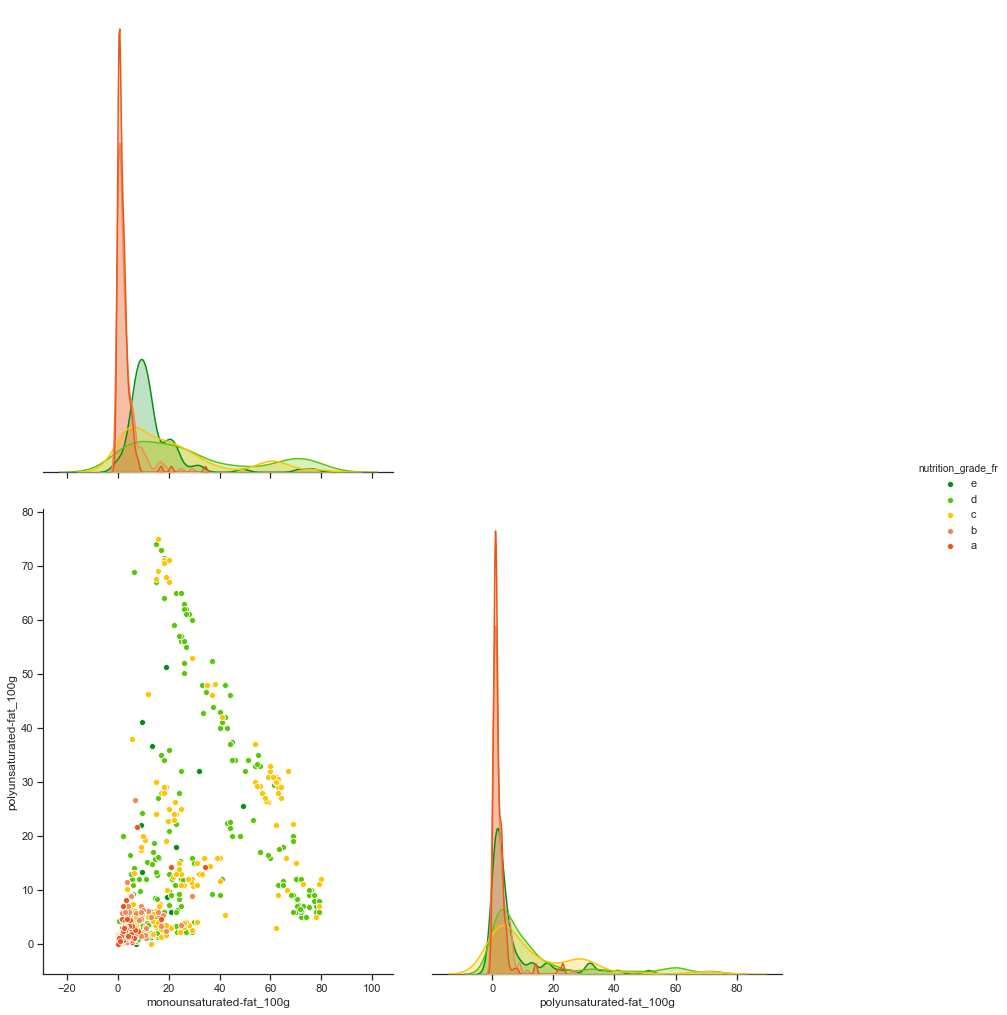

In [543]:
#----------------------------------------------------------------------------------------------------------------
#
# Pairplots - monounsaturated-fat_100gg <-> polyunsaturated-fat_100g
#
#----------------------------------------------------------------------------------------------------------------

sns.set(style="ticks")

# Palette avec les couleurs du Nutriscore

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

col1 = 'monounsaturated-fat_100g'

col2 = 'polyunsaturated-fat_100g'

g = sns.pairplot(food_data, 
                 vars=[col1,col2], 
                 hue ='nutrition_grade_fr', 
                 corner=True,
                 palette = colors
                );

g.fig.set_size_inches(15,15)


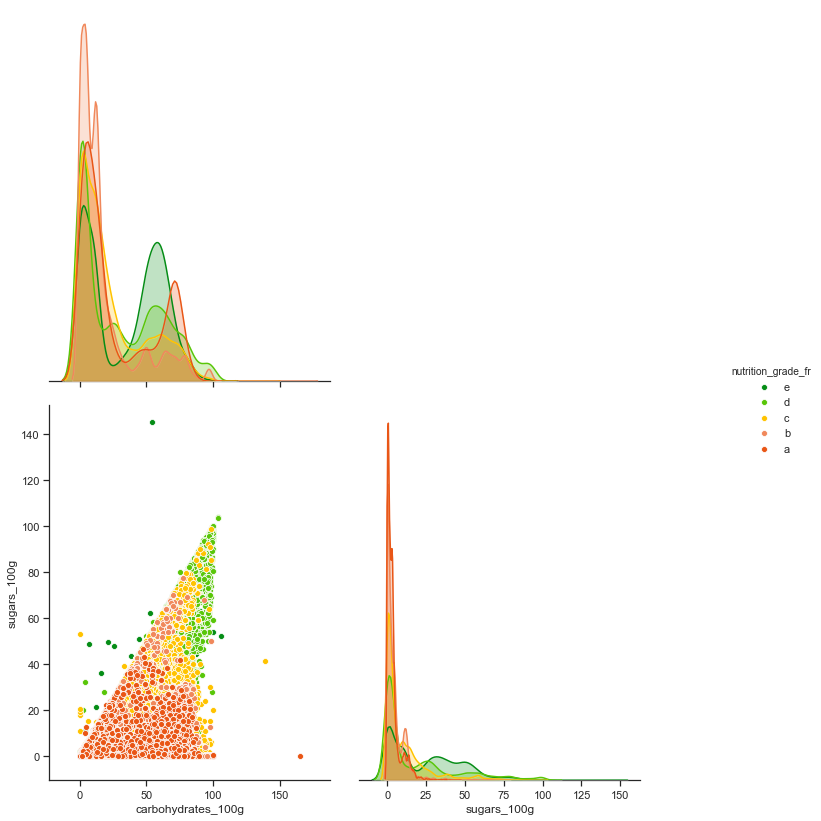

In [545]:
#----------------------------------------------------------------------------------------------------------------
#
# Pairplots - carbohydrates_100g <-> sugars_100g
#
#----------------------------------------------------------------------------------------------------------------

sns.set(style="ticks")

# Palette avec les couleurs du Nutriscore

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

col1 = 'carbohydrates_100g'

col2 = 'sugars_100g'

g = sns.pairplot(food_data, 
                 vars=[col1,col2], 
                 hue ='nutrition_grade_fr',
                 palette = colors,
                 corner = True
                );

g.fig.set_size_inches(15,15)


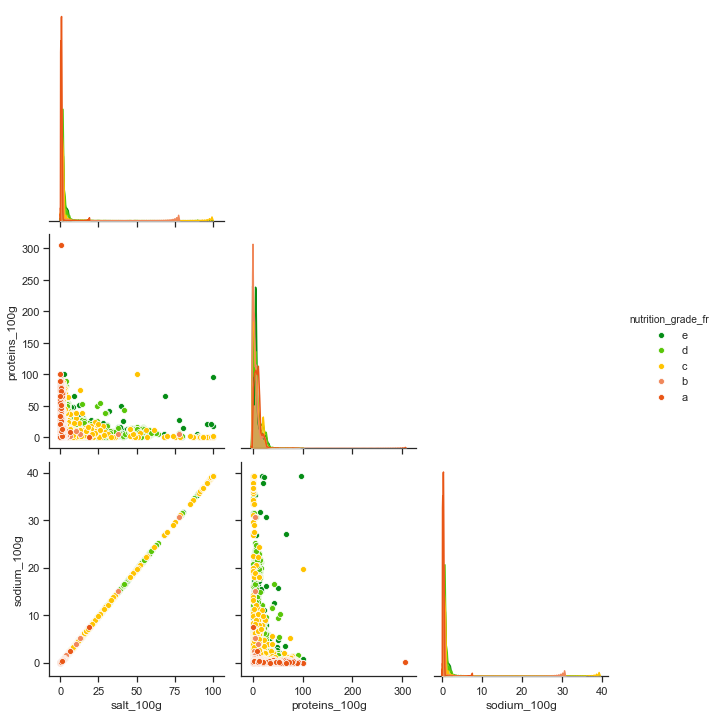

In [546]:
#----------------------------------------------------------------------------------------------------------------
#
# Pairplots - salt_100g <-> proteins_100g <-> sodium_100g
#
#----------------------------------------------------------------------------------------------------------------

sns.set(style="ticks")

# Palette avec les couleurs du Nutriscore

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

col1 = 'salt_100g'

col2 = 'proteins_100g'

col3 = 'sodium_100g'

g = sns.pairplot(food_data, 
                 vars=[col1,col2,col3], 
                 hue ='nutrition_grade_fr', 
                 palette = colors, 
                 corner = True
                )

g.fig.set_size_inches(15,15)


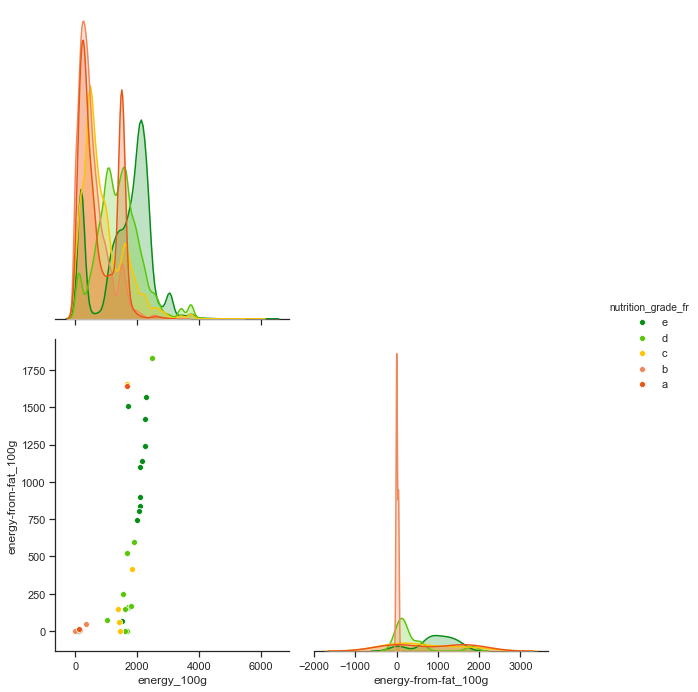

In [548]:
#----------------------------------------------------------------------------------------------------------------
#
#   Pairplots - energy_100g <-> energy-from-fat_100g
#
#----------------------------------------------------------------------------------------------------------------

sns.set(style="ticks")

# Palette avec les couleurs du Nutriscore

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

col1 = 'energy_100g'

col2 = 'energy-from-fat_100g'

g = sns.pairplot(food_data, 
                 vars=[col1,col2], 
                 hue ='nutrition_grade_fr', 
                 palette = colors,
                 corner = True
                )

g.fig.set_size_inches(15,15)


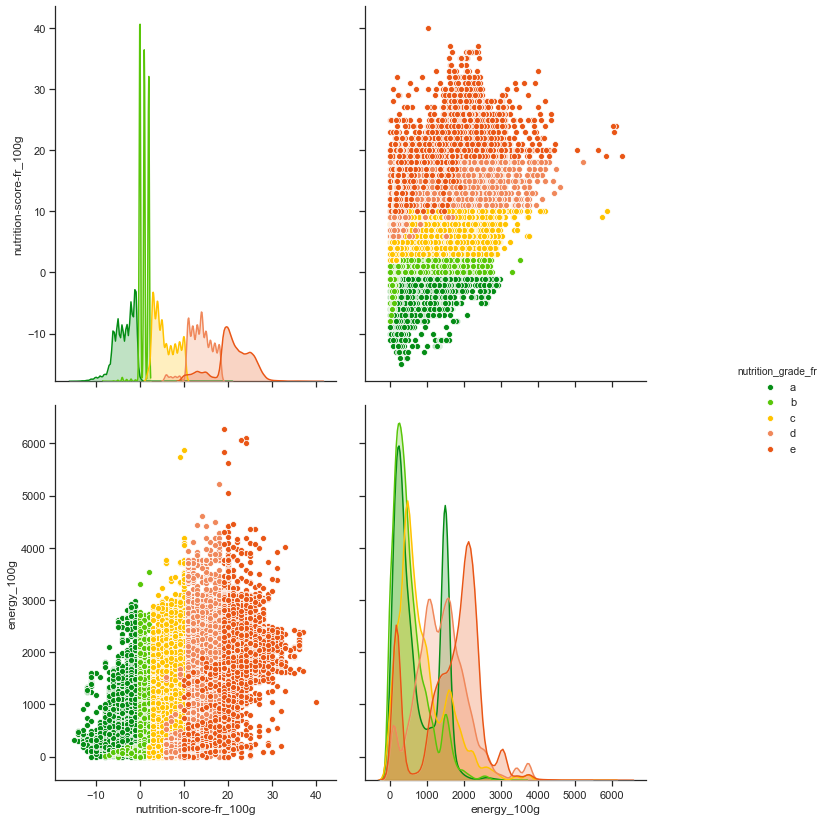

In [541]:
#----------------------------------------------------------------------------------------------------------------
#
#   Pairplots - nutrition-score-fr_100g <-> energy_100g
#
#----------------------------------------------------------------------------------------------------------------


# Palette avec les couleurs du Nutriscore

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

sns.set(style="ticks")

col1 = 'nutrition-score-fr_100g'

col2 = 'energy_100g'

g = sns.pairplot(food_data, 
                 vars=[col1,col2], 
                 hue ='nutrition_grade_fr', 
                 hue_order=['a','b','c','d','e'],
                 palette = colors
                );

g.fig.set_size_inches(15,15)

g.savefig("cor_ns_energy.jpg")

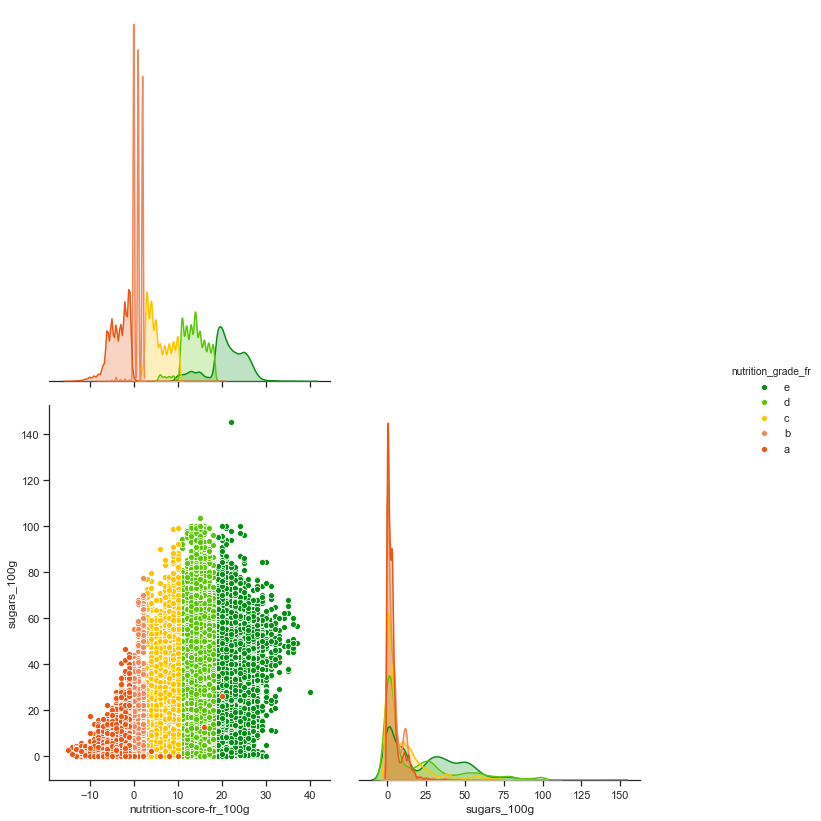

In [549]:
#----------------------------------------------------------------------------------------------------------------
#
#   Pairplots - nutrition-score-fr_100g <-> sugars_100g
#
#----------------------------------------------------------------------------------------------------------------

sns.set(style="ticks")

# Palette avec les couleurs du Nutriscore

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

col1 = 'nutrition-score-fr_100g'

col2 = 'sugars_100g'

g = sns.pairplot(food_data, 
                 vars=[col1,col2], 
                 hue ='nutrition_grade_fr', 
                 palette = colors, 
                 corner = True
                );

g.fig.set_size_inches(15,15)


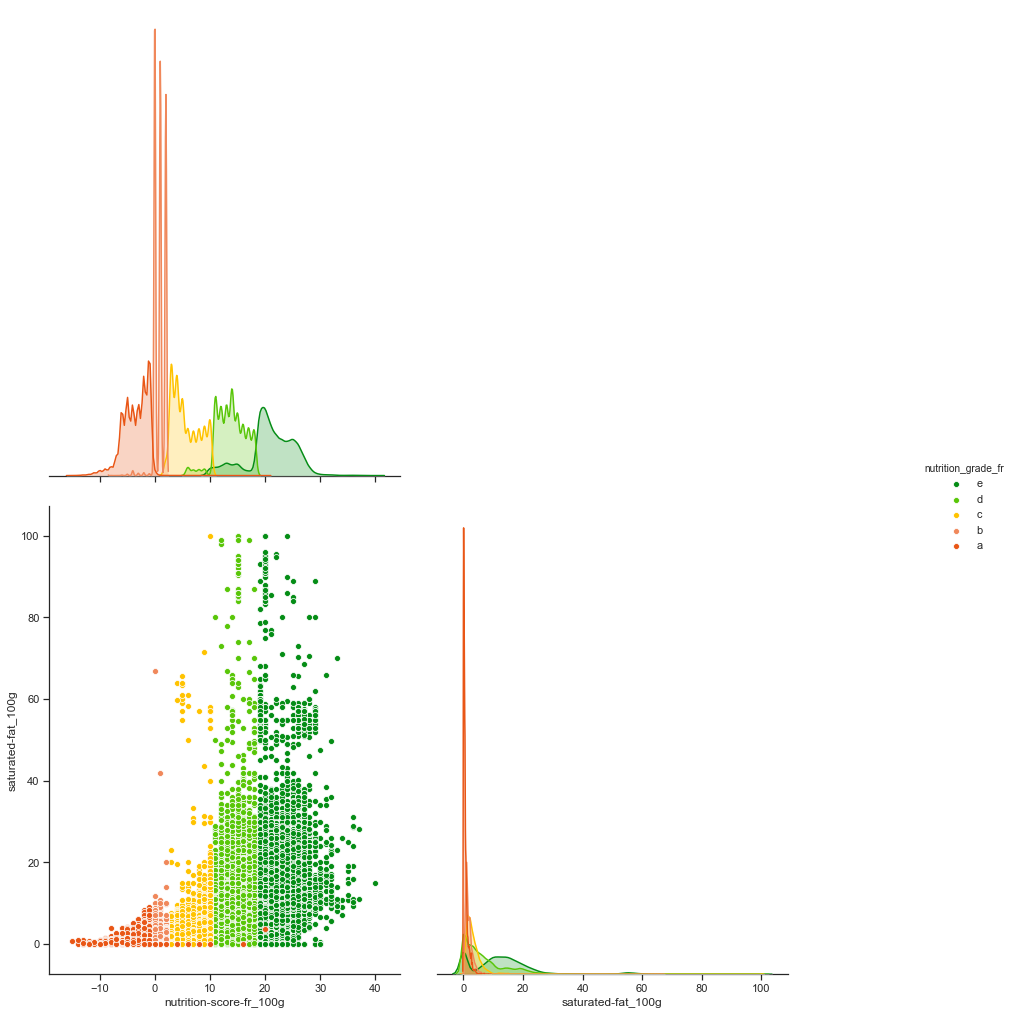

In [550]:
#----------------------------------------------------------------------------------------------------------------
#
#   Pairplots - nutrition-score-fr_100g <-> saturated-fat_100g
#
#----------------------------------------------------------------------------------------------------------------

sns.set(style="ticks")

# Palette avec les couleurs du Nutriscore

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

col1 = 'nutrition-score-fr_100g'

col2 = 'saturated-fat_100g'

g = sns.pairplot(food_data, 
                 vars=[col1,col2], 
                 hue ='nutrition_grade_fr', 
                 palette = colors, 
                 corner = True
                );

g.fig.set_size_inches(15,15)


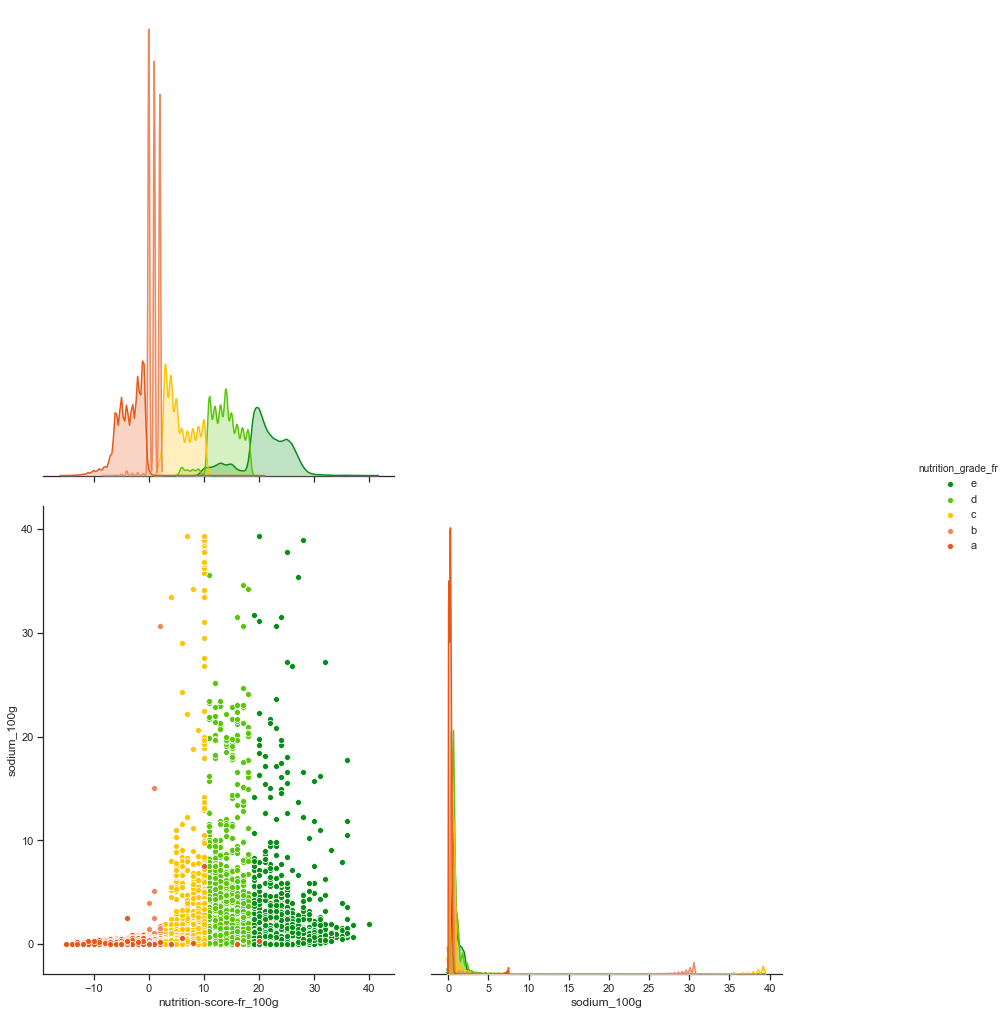

In [552]:
#----------------------------------------------------------------------------------------------------------------
#
#   Pairplots - nutrition-score-fr_100g <-> sodium_100g
#
#----------------------------------------------------------------------------------------------------------------

sns.set(style="ticks")

# Palette avec les couleurs du Nutriscore

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

col1 = 'nutrition-score-fr_100g'

col2 = 'sodium_100g'

g = sns.pairplot(food_data, 
                 vars=[col1,col2], 
                 hue ='nutrition_grade_fr', 
                 palette = colors, 
                 corner=True
                );

g.fig.set_size_inches(15,15)


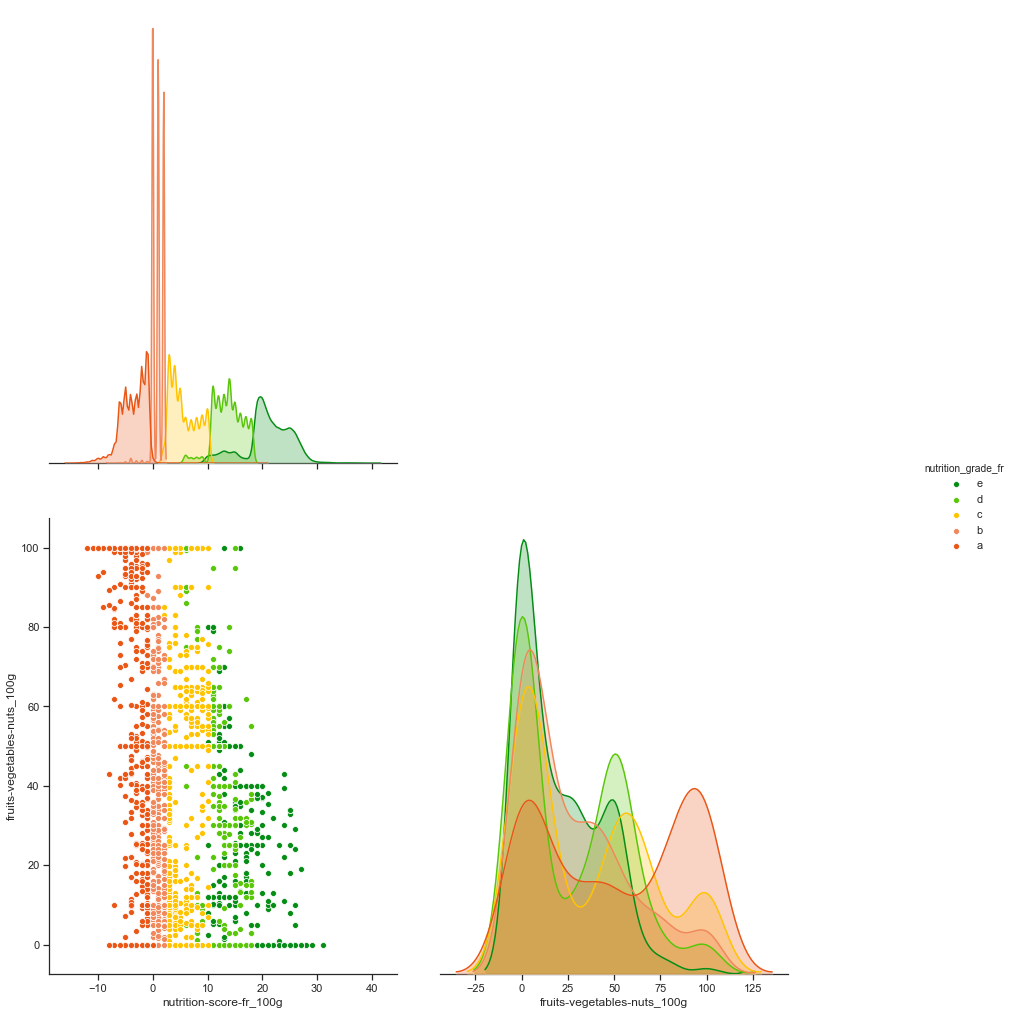

In [563]:
#----------------------------------------------------------------------------------------------------------------
#
#   Pairplots - nutrition-score-fr_100g <-> fruits-vegetables-nuts_100g
#
#----------------------------------------------------------------------------------------------------------------

sns.set(style="ticks")

# Palette avec les couleurs du Nutriscore

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

col1 = 'nutrition-score-fr_100g'

col2 = 'fruits-vegetables-nuts_100g'

g = sns.pairplot(food_data, 
                 vars=[col1,col2], 
                 hue ='nutrition_grade_fr', 
                 palette = colors, 
                 corner=True);

g.fig.set_size_inches(15,15)

g.savefig("cor_ns_frvgnt.jpg")

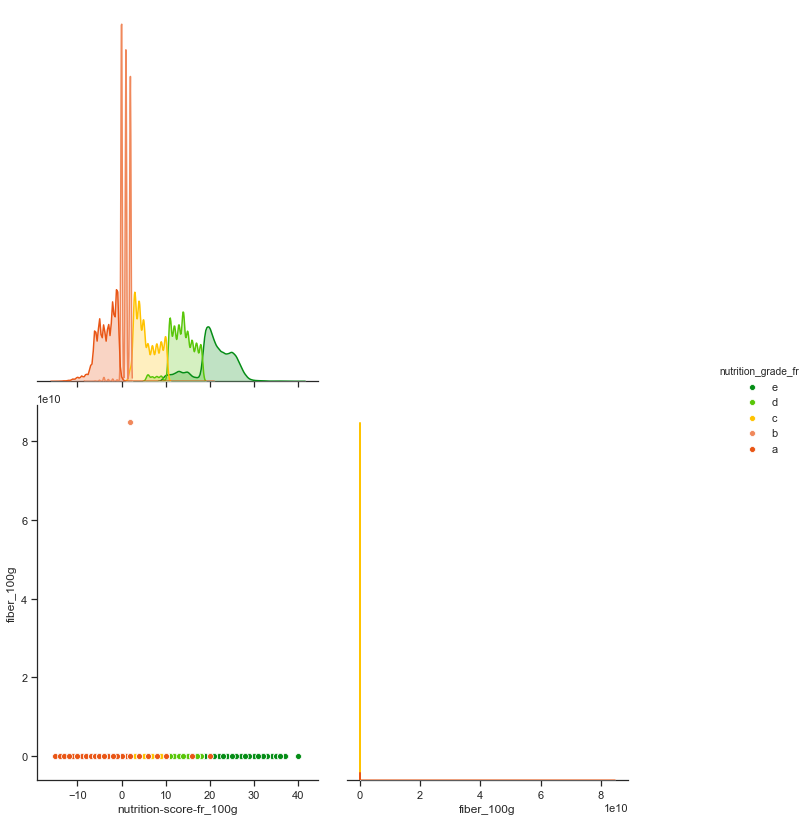

In [555]:
#----------------------------------------------------------------------------------------------------------------
#
#   Pairplots - nutrition-score-fr_100g <-> fiber_100g
#
#----------------------------------------------------------------------------------------------------------------

sns.set(style="ticks")

# Palette avec les couleurs du Nutriscore

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

col1 = 'nutrition-score-fr_100g'

col2 = 'fiber_100g'

g = sns.pairplot(food_data, 
                 vars=[col1,col2], 
                 hue ='nutrition_grade_fr',
                 palette = colors, 
                 corner = True
                );

g.fig.set_size_inches(12,12)


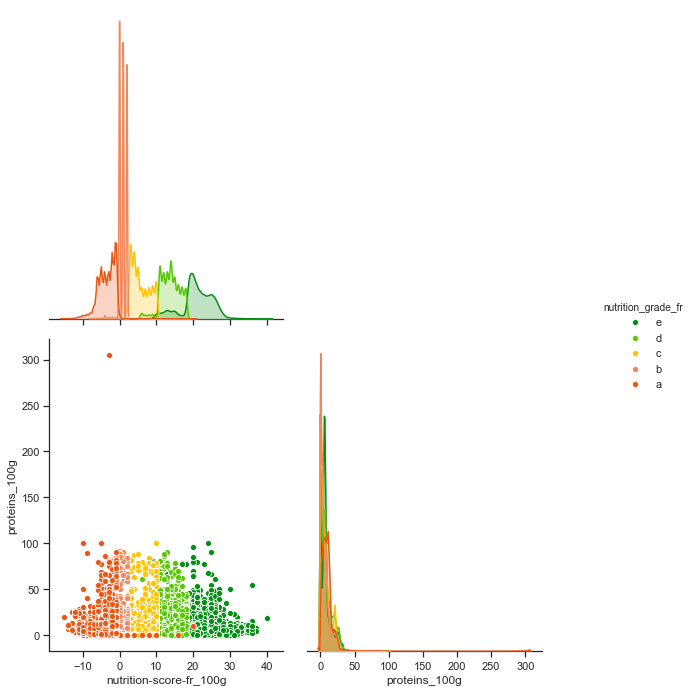

In [556]:
#----------------------------------------------------------------------------------------------------------------
#
#   Pairplots - nutrition-score-fr_100g <-> fiber_100g
#
#----------------------------------------------------------------------------------------------------------------

sns.set(style="ticks")

# Palette avec les couleurs du Nutriscore

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

col1 = 'nutrition-score-fr_100g'

col2 = 'proteins_100g'

g = sns.pairplot(food_data, 
                 vars=[col1,col2], 
                 hue ='nutrition_grade_fr', 
                 palette = colors, 
                 corner = True
                );

g.fig.set_size_inches(10,10)


In [460]:
#---------------------------------------------------------------------------------------
# Analyse numérique de nutriscore_score
#---------------------------------------------------------------------------------------

food_data['nutrition-score-fr_100g'].describe()


count    93027.000000
mean         8.856859
std          8.901751
min        -15.000000
25%          1.000000
50%          9.000000
75%         15.000000
max         40.000000
Name: nutrition-score-fr_100g, dtype: float64

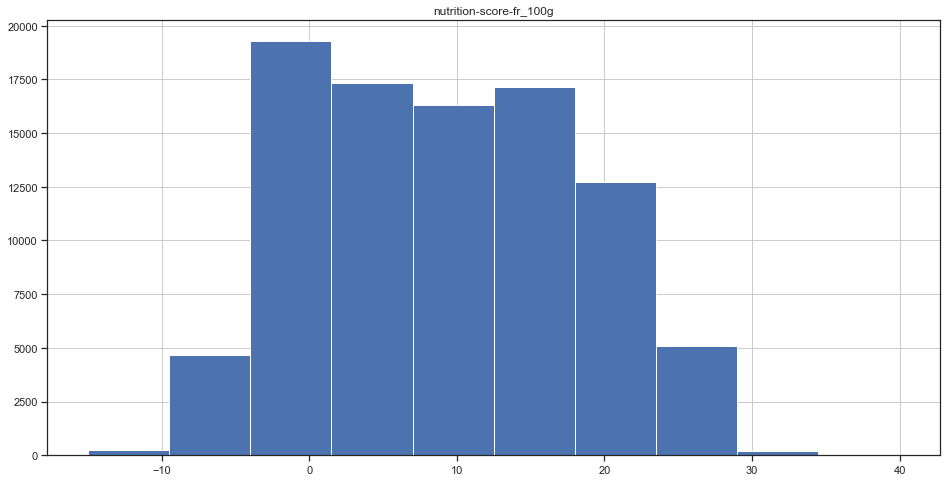

In [463]:
food_data.hist(column='nutrition-score-fr_100g', figsize =(16,8));

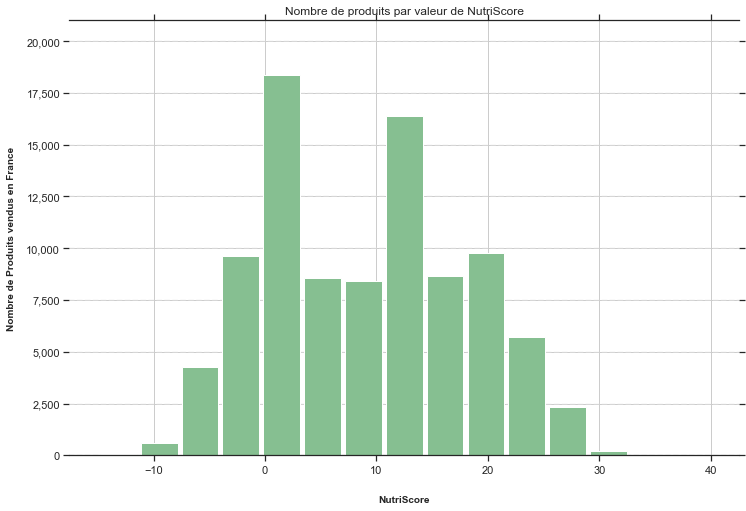

In [464]:
#---------------------------------------------------------------------------------------
#
# Analyse approfondie du NutriScore
#
#---------------------------------------------------------------------------------------

from matplotlib.ticker import StrMethodFormatter

ax = food_data.hist(column='nutrition-score-fr_100g', bins=15, grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(True)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set title
    x.set_title("Nombre de produits par valeur de NutriScore")

    # Set x-axis label
    x.set_xlabel("NutriScore", labelpad=20, weight='bold', size=10)

    # Set y-axis label
    x.set_ylabel("Nombre de Produits vendus en France", labelpad=10, weight='bold', size=10)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    

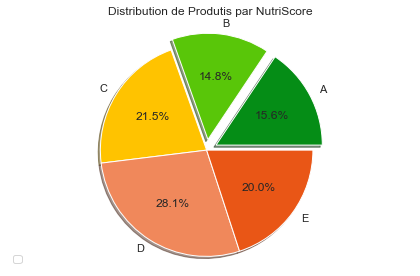

In [465]:
#---------------------------------------------------------------------------------------
#
# Analyse approfondie du nutriScore_grade - pie chart
#
# Comptage de produits par code NutriScore
#
#---------------------------------------------------------------------------------------

data_ns_grade = food_data['nutrition_grade_fr'].value_counts()

#---------------------------------------------------------------------------------------
#
# triage par le code Nutriscore Grade
#
#---------------------------------------------------------------------------------------

data_ns_grade = data_ns_grade.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)

data_ns_grade

#---------------------------------------------------------------------------------------
#
# add NutriScore colors and appropriate Nutriscore labels to pie
# 
#---------------------------------------------------------------------------------------

explode = (0.1, 0.1, 0.0, 0.0, 0.0)  

colors = ['#058d16', '#59c609', '#ffc300', '#f0885b', '#e95616']

labels = ['A', 'B', 'C', 'D', 'E']

#---------------------------------------------------------------------------------------

fig1, ax1 = plt.subplots()

plt.title('Distribution de Produtis par NutriScore')

plt.legend(labels,loc=3)

ax1.pie(data_ns_grade,
        explode=explode,
        colors=colors,
        labels=labels,
        autopct='%1.1f%%',
        shadow=True,
        startangle=0)

#---------------------------------------------------------------------------------------
#
# Equal aspect ratio ensures that pie is drawn as a circle
#
#---------------------------------------------------------------------------------------

ax1.axis('equal')  

plt.tight_layout()

plt.show()


In [557]:
#-----------------------------------------------------------------------------------
# Open Food Data Content-Based Recommendation System
#
#  1. Importing the necessary libraries
#  2. Importing the dataset
#  3. Exploratory Data Analysis
#  4. Train the recommender
#     4.1 TF-IDF (Term Frequency - Inverse Document Frequency)
#     4.3 Cosine Similarity
#     4.4 Make a recommendation to respond to a user inquiry
#----------------------------------------------------------------------------------


In [564]:
#-------------------------------------------------------------------------------------------
#
# Importing the libraries
#
#-------------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
nltk.download('stopwords')

print('Ready')

Ready


In [579]:
#---------------------------------------------------------------------------------------------------
#
#  La fonction clean_chars remplace des characters dans un dataframe par un autre
#
#  strng1: string contenant les characters à remplacer
#  strng2: string contenant les characters à chercher dans string1
#  strng3: string contenant les characters qui seront mis en place
#
#  "CHANGE DANS STRNG1 TOUS LES CHARACTERS DANS STRING2 
#  PAR LE(s) CHARACTER(S) DANS STRING3"
#
#---------------------------------------------------------------------------------------------------

def clean_chars(strng1, strng2, strng3):
    for c in strng2:
        if (c in strng1):
            strng1 = strng1.replace(c,strng3)
    return strng1


In [580]:
#------------------------------------------------------------------------------------
#
# La fonction listToString convertit la liste s en string
#
#------------------------------------------------------------------------------------

def listToString(s):  
    
    # initialise un string auxiliaire vide 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 


In [598]:
#-------------------------------------------------------------------------------------
#
#  Chargement du fichier fr.openfoodfacts.products.csv
#  Ces données ont été nettoyées dans l'étape précédente.
#  Le fichier est placé dans le repertoire courant. 
#  Le fichier contient uniquement des produits vendus en France
#
#----------------------------------------------------------------------------------------

food_data = pd.read_csv('fr.openfoodfacts.products.csv', sep=',',
                        usecols=['code',
                                 'product_name',
                                 'brands',
                                 'categories',
                                 'ingredients_text',
                                 'allergens',
                                 'nutrition_grade_fr',
                                 'nutrition-score-fr_100g'
                                ],
                        dtype = {'code': str,
                                 'product_name': str,
                                 'brands': str,
                                 'categories': str, 
                                 'ingredients_text': str,
                                 'allergens': str,
                                 'nutrition_grade_fr': str,
                                 'nutrition-score-fr_100g': float
                                }
                       )

food_data.shape

(123145, 8)

In [597]:
#-------------------------------------------------------------------------------------------
#
#  Apercu des champs alphabetiques du dataframe 
#
#  code
#  product_name
#  brands
#  categories
#  ingredients_text
#  allergens
#
#-------------------------------------------------------------------------------------------

col_names = ['product_name','brands','categories','ingredients_text','allergens']

for col in col_names:
    print(food_data[col].head(n=10).T)


0                   Farine de blé noir
1                  Naturablue original
2                        Filet de bœuf
3                 Naturakrill original
4                       Lion Peanut x2
5                              Twix x2
6                       Pack de 2 Twix
7                     lentilles vertes
8                            Root Beer
9    Biscuits sablés fourrage au cacao
Name: product_name, dtype: object
0     Ferme t'y R'nao
1         Natura4ever
2                    
3         Natura4ever
4                    
5                    
6      Twix, Lundberg
7    Bertrand Lejeune
8                 A&W
9           St Michel
Name: brands, dtype: object
0                                                     
1                                                     
2                                        Filet de bœuf
3                                                     
4                                                     
5                                                    

In [599]:
#-------------------------------------------------------------------------------------------
#
#  Comptage  des valeurs nulles par colonne 
#
#-------------------------------------------------------------------------------------------

food_data.isnull().sum(axis = 0)


code                           0
product_name                   2
brands                      6343
categories                 46635
ingredients_text           36383
allergens                  92414
nutrition_grade_fr         30118
nutrition-score-fr_100g    30118
dtype: int64

In [600]:
#-------------------------------------------------------------------------------------------
#
#  J'élimine les produits avec product_name null
#
#-------------------------------------------------------------------------------------------

food_data = food_data.dropna(subset=['product_name'])

food_data.shape


(123143, 8)

In [601]:
#------------------------------------------------------------------------------------
#
#  Re-comptage  des valeurs nulles par colonne 
#
#------------------------------------------------------------------------------------

food_data.isnull().sum(axis = 0)


code                           0
product_name                   0
brands                      6342
categories                 46633
ingredients_text           36381
allergens                  92412
nutrition_grade_fr         30116
nutrition-score-fr_100g    30116
dtype: int64

In [602]:
#-------------------------------------------------------------------------------------------
#
#  Nettoyage de champs alphanmériques #1
#
#  Suppression des blancs au début et à la fin des champs du type str
#
#  Remplacemente des nulls par des blancs dans les colonnes du type str
#
#-------------------------------------------------------------------------------------------

col_names = ['brands','categories','ingredients_text','allergens','nutrition_grade_fr']

# Suppression des blancsau débutet à la fin
for col in col_names:
    food_data[col] = food_data[col].str.strip()
    
# Remplacement des nulls par des espaces blancs  
for col in col_names:
    food_data[col] = food_data[col].fillna(' ') 
    
print('Ready')


Ready


In [603]:
#------------------------------------------------------------------------------------
#
# re-vérificatios des valeurs nulles par colonnes
#
#------------------------------------------------------------------------------------

food_data.isnull().sum(axis = 0)


code                           0
product_name                   0
brands                         0
categories                     0
ingredients_text               0
allergens                      0
nutrition_grade_fr             0
nutrition-score-fr_100g    30116
dtype: int64

In [604]:
#-------------------------------------------------------------------------------------------
#
#  Nettoyage de champs alphanumériques #2
#
#  Pour la suite, on va créer un nouveau dataframe "corpus", contenant le 'code' 
#  de produit dans une colonne et une autre contenant, et une concatenation de 
#  quelques champs alphabétiques sauf le nutritionscore_grade.
#
#  Sur ce nouveau dataframe, on va procéder au nettoyage des charactères spéciaux, 
#  de signes diacritiques, des signes orthographiques, etc., avec un '-' de separation.
#
#  Ce sera la dataframe pour les étapes suivantes.
#
#-------------------------------------------------------------------------------------------

col_names = ['code', 'description']

corpus = pd.DataFrame(columns = col_names)

col_names = ['product_name', 'brands', 'categories']

corpus['code'] = food_data['code']

corpus['description'] = food_data[col_names].agg(' '.join, axis = 1)

corpus.shape


(123143, 2)

In [605]:
#-----------------------------------------------------------------------------------
# Aperçu du corpus - 20 premiers "documents"
#-----------------------------------------------------------------------------------

print(corpus['description'].head(n=20),'\n')


0                  Farine de blé noir Ferme t'y R'nao  
1                     Naturablue original Natura4ever  
2                         Filet de bœuf   Filet de bœuf
3                    Naturakrill original Natura4ever  
4                                    Lion Peanut x2    
5                                           Twix x2    
6                       Pack de 2 Twix Twix, Lundberg  
7     lentilles vertes Bertrand Lejeune Aliments et ...
8     Root Beer A&W Boissons,Boissons gazeuses,Sodas...
9     Biscuits sablés fourrage au cacao St Michel Sn...
10    Gotta-have grape, seriously strawberry flavor ...
11    Thé noir aromatisé violette et fleurs Alice Dé...
12    Thé de Noël aromatisé orange-cannelle Alice Dé...
13    Sirops pour ganache macarons Alice Délice Siro...
14    Preparation mug cake chocolat-caramel au beurr...
15                        Mini Confettis Alice Délice  
16            Praliné Amande Et Noisette Alice Délice  
17    Côtes du Rhône Villages 2014 Union des Vig

In [606]:
#-------------------------------------------------------------------------------------------
#
#  Vérification des nulls dans les colonnes du corpus (code, description)
#
#-------------------------------------------------------------------------------------------

corpus.isnull().sum(axis = 0)


code           0
description    0
dtype: int64

In [607]:
#-------------------------------------------------------------------------------------------
#
#  Nettoyage de champs alphanmériques du corpus #3
#
#  Remplacement des charactères spéciaux par des espaces blancs dans le corpus
#
#-------------------------------------------------------------------------------------------

sp_ch = ['º','$', '%', '&','(',')','=','*','?','^','+','*','¨',';',':','`','-','_','/','´',
         '_',',','ª','¿','¡','Ç','{','}','[',']','<','>','\'','´']

for i in range(0,len(corpus)):
    aux_desc1 = corpus.iloc[i,1]
    aux_desc2 = clean_chars(aux_desc1,sp_ch,' ')
    corpus.iloc[i,1] = aux_desc2

print('Ready')


Ready


In [608]:
#-------------------------------------------------------------------------------------
#
#  Nettoyage de champs alphanmériques #4
#
#  Lemmatisation du corpus
# 
#  La méthode utilisée est celle de FrechStemmer disponible dans ntlk.
#
#-------------------------------------------------------------------------------------

for k in range(0,len(corpus)):
    strng1 = corpus.iloc[k,1]
    list1 = strng1.split(' ')
    stemr1 = []
    stemr1 += [stemmer.stem(w) for w in list1 if not w in stemr1]
    aux_set = set(stemr1)
    list1 = list(aux_set) 
    strng1 = ' '.join(list1)
    corpus.iloc[k,1] = strng1
    
print('Ready')

Ready


In [609]:
#-------------------------------------------------------------------------------------
#
#  Nettoyage de champs alphanmériques #5
#
#  Remplacement des charactères avec des signes diacritiques (â, ü, etc)
#  par des charactères simplifiés
# 
#  Le fichier alphabet.csv contient deux colonnes de charactères,
#  avec tous les lettres de l'alphabet latin, et presque toutes les 
#  possibilités de signes diacritiques connus, avec son remplacement 
#  correspondant dans chaque cas.
#
#-------------------------------------------------------------------------------------

alphabet = pd.DataFrame(['initial','final'])

alphabet = pd.read_csv('alphabet.csv',
                     sep=',',
                     usecols=['initial', 'final'],
                     dtype = {'initial': str, 'final': str}
                    )

#------------------------------------------------------------------------------------
#
#  Remplacemet de tous les characters avec des signes diacritiques, 
#  lettres doubles, etc. dans le corpus. Cette étape fait en plus le même
#  travail de remplacer les majuscules par des minuscules (lower()).
#
#-------------------------------------------------------------------------------------

for k in range(0,len(corpus)):
    strng1 = corpus.iloc[k,1]
    for i in range(0,len(alphabet)):
        strng2 = alphabet.iloc[i,0]
        strng3 = alphabet.iloc[i,1]
        strng1 = clean_chars(strng1, strng2, strng3)
    corpus.iloc[k,1] = strng1
    
print('Ready')


Ready


In [610]:
#------------------------------------------------------------------------------------
#
# Aperçu des premiers 20 documents du corpus
#
#------------------------------------------------------------------------------------

print(corpus['description'].head(n=30),'\n')


0                     y  t ble de r noir nao farin ferm
1                         naturablu  original natura4ev
2                                        de boeuf filet
3                        natura4ev original naturakrill
4                                        lion peanut x2
5                                               x2 twix
6                               lundberg 2 de pack twix
7     aliment grain vert et bertrand origin legum se...
8              sod root a be gazeux beer w boisson sucr
9     snack biscuit st cacao fourrag au et michel sa...
10     snack confiser hav seriously flavor gott stra...
11    violet delic aromatis en alic et the beverag n...
12    aliment orang aromatis chaud et the origin suc...
13                 sirop delic pour macaron ganach alic
14     cak delic chocolat sal alic au beurr prepar c...
15                                delic confet min alic
16                    delic amand alic et noiset pralin
17    franc villag du union 2014 vign cot vin bo

In [611]:
#-----------------------------------------------------------------------------------
#
#  On enlève les blancs au début et à la fin des descriptions du corpus
# 
#-----------------------------------------------------------------------------------

for i in range(0, len(corpus)):
    corpus.iloc[i,1] = corpus.iloc[i,1].strip()

print('Ready')


Ready


In [612]:
#-----------------------------------------------------------------------------------
#
#  En utilisant la fonction STOPWORDS en français et en anglais, on élimine 
#  les mots inutiles de la description.
#  
#  Ce snypet réalise aussi un travail de simplification des descriptions: élimine 
#  les mots qui se repètent ce qui est souvent le cas avec les champs product_name,  
#  ingredients_text.
#  
#  Pour cela, je transforme le string en liste (tokenisation),la liste en ensemble
#  (opérateur "set", qui élimine les éléments répetés), et ensuite l'ensemble
#  en string qui est stocké à nouveau dans le corpus pour les étapes suivantes.
#
#------------------------------------------------------------------------------------

abcd = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','y','z','',""]

stop_words = set(stopwords.words('french'))

for ch in abcd:
    stop_words.add(ch)

for i in range(0,len(corpus)):
    bow = corpus.iloc[i,1].split()
    bow_wo_sw = [word for word in bow if not word in stop_words]
    bow_wo_sw_set = set(bow_wo_sw)
    bow_wo_sw = list(bow_wo_sw_set)   
    corpus.iloc[i,1] = listToString(bow_wo_sw)
    
print('Ready!')

stop_words = set(stopwords.words('english'))

for i in range(0,len(corpus)):
    bow = corpus.iloc[i,1].split()
    bow_wo_sw = [word for word in bow if not word in stop_words]
    bow_wo_sw_set = set(bow_wo_sw)
    bow_wo_sw = list(bow_wo_sw_set)   
    corpus.iloc[i,1] = listToString(bow_wo_sw)
    
print('Ready!!')

Ready!
Ready!!


In [613]:
#-----------------------------------------------------------------------------------
#    Aperçu du corpus - 20 premiers "documents"
#-----------------------------------------------------------------------------------

print(corpus['description'].head(n=30),'\n')

0                               ble noir nao farin ferm
1                          naturablu original natura4ev
2                                           boeuf filet
3                        natura4ev original naturakrill
4                                        lion peanut x2
5                                               x2 twix
6                                  lundberg 2 twix pack
7     legumin aliment lentill grain bertrand vert po...
8                     sod root gazeux beer boisson sucr
9     snack biscuit st cacao fourrag gateau michel s...
10    snack confiser hav seriously flavor gott straw...
11        violet delic aromatis alic beverag noir fleur
12    noel aliment noir orang delic aromatis chaud i...
13                      sirop delic macaron ganach alic
14    cak chocolat delic sal alic beurr prepar caram...
15                                min alic delic confet
16                       delic amand alic noiset pralin
17    franc villag union rhon vign cot vin 2014 

In [614]:
#-------------------------------------------------------------------------------------------
#
#                         Interfae Utilisateur
#
#   L'utilisateur introduit sa requête pour un type de produit souhaité
#
#   La réponse est stockée dans la variable "user_input"
#
#-------------------------------------------------------------------------------------------

user_input = input("Décrivez le produit cherché: ")

#user_input = "gâteaux des chocolats"     # example pour tester



#-------------------------------------------------------------------------------------------
#
#  user_input est nettoyé et normalisé comme les descriptions du corpus
#
#-------------------------------------------------------------------------------------------

# on élimine tous les charactères spéciaux, remplacés par des espaces en blanc

sp_ch = ['º','$', '%', '&','(',')','=','*','?','^','+','*','¨',';',':','`','-','_','/','´',
         '_',',','ª','¿','¡','Ç','{','}','[',']','<','>','\'','´']

user_input = clean_chars(user_input,sp_ch,' ')

strng1 = user_input

list1 = strng1.split(' ')

stemr1 = []

stemr1 += [stemmer.stem(w) for w in list1 if not w in stemr1]

aux_set = set(stemr1)

list1 = list(aux_set) 

strng1 = ' '.join(list1)

user_input = strng1

for i in range(0,len(alphabet)):
    strng2 = alphabet.iloc[i,0]
    strng3 = alphabet.iloc[i,1]
    user_input = clean_chars(user_input, strng2, strng3)

#-----------------------------------------------------------------------------------
#   user_input est en suite transformé en "sac de paroles (bag of words)"
#   on élimine les stop words, en somme,les mêmes procédés que pour le corpus.
#-----------------------------------------------------------------------------------

user_input_BOW = user_input.split()

stop_words = set(stopwords.words('french'))

ui_wo_sw = [word for word in user_input_BOW if not word in stop_words]

stop_words = set(stopwords.words('english'))

ui_wo_sw_set = set(ui_wo_sw)

user_input_BoW = list(ui_wo_sw_set) 

user_input = listToString(user_input_BoW)

print(user_input)


Décrivez le produit cherché:  gâteaux de chocolats


gateau chocolat


In [615]:
#------------------------------------------------------------------------------------------
#
#  Initialise CountVectorizer pour le corpus
#
#  A fin de commencer l'utlisation de TfidfTransformer, on a besoin de créer 
#  d'abord un CountVectorizer por compter le nombre de mots (term frequency)
#  limité la taille du vocabulaire, apliqué les stop words, etc. 
#
#-------------------------------------------------------------------------------------------
#  Instantiate CountVectorizer()
#-------------------------------------------------------------------------------------------

cv = CountVectorizer()

#---------------------------------------------------------------------------------
# this steps generates word counts for the words in the corpus
#---------------------------------------------------------------------------------

word_count_vector = cv.fit_transform(corpus['description'])

word_count_vector.shape


(123143, 29843)

In [616]:
#---------------------------------------------------------------------------------
#  Initialise CountVectorizer pour la requête de l'utilisateur
#  IF, TFIDD pour la requête de l'utilisateur
#---------------------------------------------------------------------------------

cv2 = CountVectorizer()

word_count_vector2 = cv2.fit_transform([user_input])

word_count_vector2.shape


(1, 2)

In [617]:
#------------------------------------------------------------------------------------
#
#  C'est lo moment de calculer les IDFs du corpus: J'utlise toutes les valeurs 
#  par défaut du CountVectorizer. Cette étape peut être largement améliorée en 
#  rajoutant des valeurs en paramétrisant en détail la fonction TfidfTransformer.
#
#------------------------------------------------------------------------------------

tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)

tfidf_transformer.fit(word_count_vector)

print('Ready')


Ready


In [618]:
#------------------------------------------------------------------------------------
# 
#  Calcul des points TFIDF pour les documents stockés dans le corpus.
#
#------------------------------------------------------------------------------------

count_vector = cv.transform(corpus['description'])

# calcul des tf-idf scores

tf_idf_vector = tfidf_transformer.transform(count_vector)

print('Ready')


Ready


In [619]:
#---------------------------------------------------------------------------------
#  IF, TFIDD pour la requête de l'utilisateur
#---------------------------------------------------------------------------------

count_vector2 = cv.transform([user_input])

# tf-idf scores

tf_idf_vector2 = tfidf_transformer.transform(count_vector2)

print('Ready')


Ready


In [620]:
#------------------------------------------------------------------------------------
#  
#  Calcul de la distances du vecteur "user_input" aux vecteurs du corpus
#  en uitlisant la fonction cosine_similarity.
#
#  Les résultats sont stockés dans une nouvelle colonne du corpus: "distances"
#  et triés, par la "distance" (le score cosinus_similarity en ordre décroissant)
#
#------------------------------------------------------------------------------------

corpus['distances'] = cosine_similarity(tf_idf_vector,tf_idf_vector2) 

corpus.sort_values(by=['distances'], ascending=False, inplace=True)

print('Ready')


Ready


In [621]:
#-----------------------------------------------------------------------------------
#
#  On prépare maintenant les réponses pour l'utilisateur. 
#  D'abord on crée un nouveau dataframe, avec les colonnes d'information à
#  être montrées: code du produit, nom, categorie,et son nutriscore associé
#
#------------------------------------------------------------------------------------

col_names = ['code', 'product_name', 'categories', 'nutrition_grade_fr']

results = pd.DataFrame(columns = col_names)

# Seulement les premiers 5 produits plus pertinent
results = corpus[0:5]

print(results)


                 code                description  distances
98901   4335896705811            gateau chocolat   1.000000
82801   3596710411962     gateau auchan chocolat   0.800143
45532   3263852663992  gateau chocolat pric lead   0.646571
94422   3780699504955                   chocolat   0.615080
107607  5900951265884                   chocolat   0.615080


In [652]:
#----------------------------------------------------------------------------------
# On recupère des infos du dataframe d'origine avec un JOIN par "code"
# qui est le "champ" en commun.
#----------------------------------------------------------------------------------

final_results = results.join(food_data.set_index('code'), on='code')

# on élimine le colonnes inutiles pour la présentation

final_results = final_results.drop('description', 1)
final_results = final_results.drop('distances', 1)
final_results = final_results.drop('ingredients_text', 1)
final_results = final_results.drop('categories', 1)

# On donne une estimation aux valeurs nulles du nutriscore_grade basée sur les similarités trouvées


final_results.T


,98901,82801,45532,94422,107607
code,4335896705811,3596710411962,3263852663992,3780699504955,5900951265884
product_name,Gateau au Chocolat,Gateau Au Chocolat,Gâteau au chocolat,chocolat,m&m's chocolat
brands,,Auchan,Leader Price,,m&m's
allergens,,,"blé, œufs, soja, blé",,
nutrition_grade_fr,,e,d,,e
nutrition-score-fr_100g,NaN,25,15,NaN,25


In [640]:
final_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 98901 to 107607
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     5 non-null      object 
 1   product_name             5 non-null      object 
 2   brands                   5 non-null      object 
 3   allergens                5 non-null      object 
 4   nutrition_grade_fr       5 non-null      object 
 5   nutrition-score-fr_100g  3 non-null      float64
dtypes: float64(1), object(5)
memory usage: 308.0+ bytes


In [658]:
#-----------------------------------------------------------------------------------
#  Impression des résultats finaux triés par la colonne NutriScore
#-----------------------------------------------------------------------------------

final_results.sort_values(by=['nutrition-score-fr_100g'], ascending=True, inplace=True)

ns_g = 'c'
ns_v = 9        # la mmédiane de Nutriscore_France

for i in range(0,len(final_results)):
    if (pd.isnull(final_results.iloc[i,5])):
        final_results.iloc[i,4] = ns_g + '*'
        final_results.iloc[i,5] = ns_v
    else:
        ns_g = final_results.iloc[i,4]
        ns_v = final_results.iloc[i,5]
        

print('\n\n Le système vous conseille les produits suivants:', '\n\n')

final_results

#-----------------------------------------------------------------------------------
#                                    FIN Du PROJET
#-----------------------------------------------------------------------------------




 Le système vous conseille les produits suivants: 




,code,product_name,brands,allergens,nutrition_grade_fr,nutrition-score-fr_100g
45532,3263852663992,Gâteau au chocolat,Leader Price,"blé, œufs, soja, blé",d,15.0
82801,3596710411962,Gateau Au Chocolat,Auchan,,e,25.0
107607,5900951265884,m&m's chocolat,m&m's,,e,25.0
98901,4335896705811,Gateau au Chocolat,,,e*,25.0
94422,3780699504955,chocolat,,,e*,25.0
